In [1]:
#Importing the Libraries into the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")



In [2]:
# Open and load the YAML file
with open('../config/settings.yaml', 'r') as file:
    config = yaml.safe_load(file)

print(config)  # This will print the contents of the YAML file

{'data': {'raw': '../data/raw/IBMEmployee_data.csv', 'clean': None}}


In [3]:
#Read the csv file into pandas dataframe.
df_employee = pd.read_csv(config['data']['raw'])
display (df_employee)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,1,Male,3,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,3,Male,4,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,4,Male,2,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,2,Male,4,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,4,Male,2,...,3,4,0,17,3,2,9,6,0,8


In [4]:
#Checking the dataframe for summary
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  NumCompaniesWorked      

In [5]:
#Checking the dataframe for null values.
df_employee.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [6]:
#checking dataframe for duplicates.
df_employee.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [7]:
# Check for all occurrences of duplicates (mark all duplicates as True)
duplicates_mask_all = df_employee.duplicated(keep=False)

# Display all duplicated rows (including first occurrences)
duplicate_rows_all = df_employee[duplicates_mask_all]

# Show the duplicate rows
print(duplicate_rows_all)

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EnvironmentSatisfaction, Gender, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, NumCompaniesWorked, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 27 columns]


In [8]:
#Checking the descriptive statistics for the dataframe
df_employee.describe(include = "all")
                     

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,NaN,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,NaN,Male,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,NaN,882,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,2.721769,NaN,2.729932,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,1.093082,NaN,0.711561,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,1.000000,NaN,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,2.000000,NaN,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,3.000000,NaN,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,4.000000,NaN,3.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [9]:
# Check for all columns in the dataset
df_employee.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
#checking for the unique values in Attrition column.
df_employee['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [11]:
# Filter rows where Attrition is "Yes", which typically indicates voluntary resignation
voluntary_resignations = df_employee[df_employee['Attrition'] == 'Yes']
display("Voluntary Resignations:",voluntary_resignations)
print("Toatl Voluntary Resignations:",len(voluntary_resignations))

'Voluntary Resignations:'

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,3,Male,2,...,3,2,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,3,Male,2,...,4,2,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,2,Male,3,...,3,3,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,3,4,Male,3,...,3,1,1,1,3,2,1,0,1,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,4,1,Male,3,...,3,2,3,4,3,4,2,2,2,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7,2,4,Male,3,...,3,4,1,14,4,1,10,9,9,8
1452,50,Yes,Travel_Frequently,878,Sales,1,4,2,Male,3,...,3,4,2,12,3,3,6,3,0,1


Toatl Voluntary Resignations: 237


In [12]:
#calculate the percentage of employees who left company
attrition_rate = df_employee['Attrition'].value_counts(normalize = True)*100 #normalize=true with value_counts returns values in proportion.
attrition_rate

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

In [13]:
#checking for the unique values in department column
df_employee['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [14]:
# Mapping the level of education.
education_mapping ={
1:'Below College',
2:'College',
3:'Bachelor',
4:'Master',
5:'Doctor'
}
 # Replace numerical codes with education labels
df_employee['Education'] = df_employee['Education'].map(education_mapping)

# Display the updated DataFrame
display(df_employee)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,2,Female,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,3,Male,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,4,Male,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,4,Female,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,1,Male,3,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,College,3,Male,4,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,4,Male,2,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,2,Male,4,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,4,Male,2,...,3,4,0,17,3,2,9,6,0,8


In [15]:
# Add the 'monthly_salary' column by multiplying 'dailyrate' by 22 (working days)
df_employee['MonthlySalary'] = df_employee['DailyRate'] * 22

# Display the updated DataFrame
display(df_employee)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlySalary
0,41,Yes,Travel_Rarely,1102,Sales,1,College,2,Female,3,...,1,0,8,0,1,6,4,0,5,24244
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,3,Male,2,...,4,1,10,3,3,10,7,1,7,6138
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,4,Male,2,...,2,0,7,3,3,0,0,0,0,30206
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,4,Female,3,...,3,0,8,3,3,8,7,3,0,30624
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,1,Male,3,...,4,1,6,3,3,2,2,2,2,13002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,College,3,Male,4,...,3,1,17,3,3,5,2,0,3,19448
1466,39,No,Travel_Rarely,613,Research & Development,6,Below College,4,Male,2,...,1,1,9,5,3,7,7,1,7,13486
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor,2,Male,4,...,2,1,6,0,3,6,2,0,3,3410
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor,4,Male,2,...,4,0,17,3,2,9,6,0,8,22506


In [16]:
# Filter the DataFrame for employees with Attrition marked as 'Yes'
df_employee_attrition_yes = df_employee[df_employee['Attrition'] == 'Yes']

# Group by the 'MonthlySalary' and count occurrences
monthly_salary_counts_y = df_employee_attrition_yes['MonthlySalary'].value_counts()

# Display the result
display(monthly_salary_counts_y)


MonthlySalary
17886    2
17754    2
6996     2
5280     2
31878    2
        ..
14036    1
24024    1
6820     1
19316    1
9020     1
Name: count, Length: 219, dtype: int64

In [17]:
# Filter the DataFrame for employees with Attrition marked as 'Yes'
df_employee_attrition_no = df_employee[df_employee['Attrition'] == 'No']

# Group by the 'MonthlySalary' and count occurrences
monthly_salary_counts_n = df_employee_attrition_no['MonthlySalary'].value_counts()

# Display the result
display(monthly_salary_counts_n)


MonthlySalary
15202    6
23804    5
20262    4
28226    4
7238     4
        ..
28578    1
29612    1
30558    1
24706    1
14806    1
Name: count, Length: 802, dtype: int64

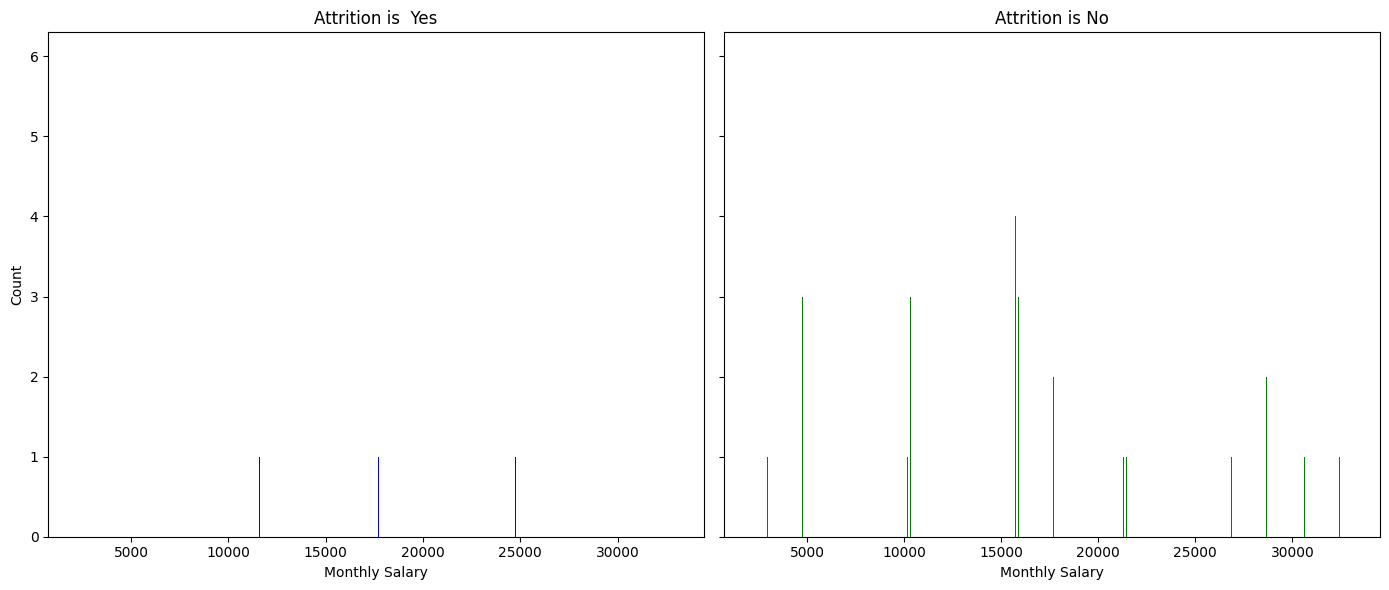

In [18]:
#Creating the subplots side-by-side to check for the results and compare.

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for Attrition == 'Yes'
axes[0].bar(monthly_salary_counts_y.index,monthly_salary_counts_y.values,  color='blue')
axes[0].set_title('Attrition is  Yes')
axes[0].set_xlabel('Monthly Salary')
axes[0].set_ylabel('Count')

# Plot for Attrition == 'No'
axes[1].bar(monthly_salary_counts_n.index,monthly_salary_counts_n.values , color='green')
axes[1].set_title('Attrition is No')
axes[1].set_xlabel('Monthly Salary')

# Display the plots
plt.tight_layout()
plt.show()

In [19]:
# Group by the 'DailyRate' and count occurrences for attrition is 'yes'
daily_rate_counts_y = df_employee_attrition_yes['DailyRate'].value_counts()
display(daily_rate_counts_y)


DailyRate
813     2
807     2
318     2
240     2
1449    2
       ..
638     1
1092    1
310     1
878     1
410     1
Name: count, Length: 219, dtype: int64

In [20]:
# Group by the 'DailyRate' and count occurrences for attrition is 'no'
daily_rate_counts_n = df_employee_attrition_no['DailyRate'].value_counts()
display(daily_rate_counts_n)


DailyRate
691     6
1082    5
921     4
1283    4
329     4
       ..
1299    1
1346    1
1389    1
1123    1
673     1
Name: count, Length: 802, dtype: int64

In [21]:
# Calculate mean DailyRate for Attrition == 'Yes'
mean_daily_rate_yes = df_employee[df_employee['Attrition'] == 'Yes']['DailyRate'].mean()

# Calculate mean DailyRate for Attrition == 'No'
mean_daily_rate_no = df_employee[df_employee['Attrition'] == 'No']['DailyRate'].mean()
# Print the results
print(f"Mean DailyRate for Attrition = Yes: {mean_daily_rate_yes}")
print(f"Mean DailyRate for Attrition = No: {mean_daily_rate_no}")

Mean DailyRate for Attrition = Yes: 750.3628691983122
Mean DailyRate for Attrition = No: 812.5044606650446


In [22]:
# Calculate mean DailyRate for Attrition == 'Yes'
mean_monthly_salary_yes = df_employee[df_employee['Attrition'] == 'Yes']['MonthlySalary'].mean()

# Calculate mean DailyRate for Attrition == 'No'
mean_monthly_salary_no = df_employee[df_employee['Attrition'] == 'No']['MonthlySalary'].mean()
# Print the results
print(f"Mean Monthly Salary for Attrition = Yes: {mean_monthly_salary_yes}")
print(f"Mean Monthly Salary for Attrition = No: {mean_monthly_salary_no}")

Mean Monthly Salary for Attrition = Yes: 16507.983122362868
Mean Monthly Salary for Attrition = No: 17875.09813463098


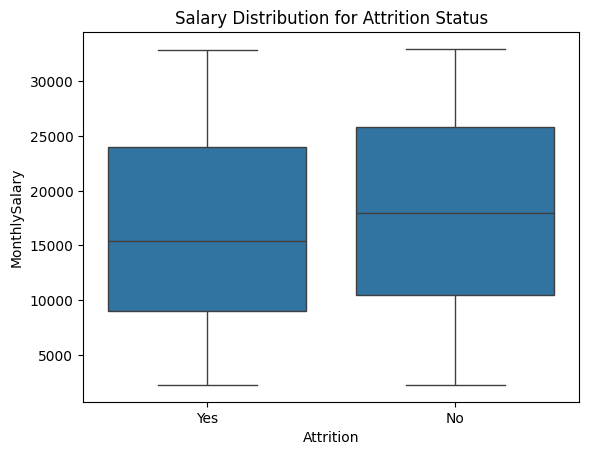

In [23]:
sns.boxplot(x='Attrition', y='MonthlySalary', data=df_employee)
plt.title('Salary Distribution for Attrition Status');

In [24]:
# Sort the DataFrame by 'MonthlySalary' in descending order
df_sorted_by_salary = df_employee.sort_values(by='MonthlySalary', ascending=False)
# Get the top 5 salaries
top_5_salaries = df_sorted_by_salary['MonthlySalary'].head(5)
display(top_5_salaries)



427     32978
986     32956
1056    32912
155     32912
471     32890
Name: MonthlySalary, dtype: int64

In [25]:
# Step 1: Sort the DataFrame by 'MonthlySalary' in descending order and get top 5 salaries
top_salaries = df_employee['MonthlySalary'].nlargest(200)

#  Check how many employees with Attrition == 'Yes' have a salary in the top 5 salaries
attrition_yes_top_salaries = df_employee_attrition_yes[df_employee_attrition_yes['MonthlySalary'].isin(top_salaries)]

# Step 4: Count the number of such employees
count_attrition_yes_top_salaries = attrition_yes_top_salaries.shape[0]

# Display the result
print(f"Number of employees with Attrition == 'Yes' in the top salary range: {count_attrition_yes_top_salaries}")

Number of employees with Attrition == 'Yes' in the top salary range: 32


In [26]:
#checking for the number of unique values in the salary column
df_employee['MonthlySalary'].nunique()

886

In [27]:
#Analyze the factors like age.
df_employee.groupby(['Attrition'])['Age'].mean().round(2)

Attrition
No     37.56
Yes    33.61
Name: Age, dtype: float64

In [28]:
#Analyze the factors like Department.
df_employee.groupby(['Attrition'])['Department'].value_counts()

Attrition  Department            
No         Research & Development    828
           Sales                     354
           Human Resources            51
Yes        Research & Development    133
           Sales                      92
           Human Resources            12
Name: count, dtype: int64

In [29]:
#Group by 'Department' and calculate the average salary
department_salary = df_employee.groupby('Department')['MonthlySalary'].mean().round(2)

#Sort the departments by the average salary in descending order
department_salary_sorted = department_salary.sort_values(ascending=False)

# Display the result
print("Average salary by department (sorted):")
display(department_salary_sorted)


Average salary by department (sorted):


Department
Research & Development    17750.73
Sales                     17606.07
Human Resources           16533.87
Name: MonthlySalary, dtype: float64

In [30]:
#Analyze the attrition with JobRole.
df_employee.groupby(['Attrition'])['JobRole'].value_counts()

Attrition  JobRole                  
No         Sales Executive              269
           Research Scientist           245
           Laboratory Technician        197
           Manufacturing Director       135
           Healthcare Representative    122
           Manager                       97
           Research Director             78
           Sales Representative          50
           Human Resources               40
Yes        Laboratory Technician         62
           Sales Executive               57
           Research Scientist            47
           Sales Representative          33
           Human Resources               12
           Manufacturing Director        10
           Healthcare Representative      9
           Manager                        5
           Research Director              2
Name: count, dtype: int64

In [31]:
#Analyze with Business Travel
df_employee.groupby(['Attrition'])['BusinessTravel'].value_counts()

Attrition  BusinessTravel   
No         Travel_Rarely        887
           Travel_Frequently    208
           Non-Travel           138
Yes        Travel_Rarely        156
           Travel_Frequently     69
           Non-Travel            12
Name: count, dtype: int64

In [32]:
#Analyze with Percentage Salary Hike.
df_employee.groupby(['Attrition'])['PercentSalaryHike'].value_counts()

Attrition  PercentSalaryHike
No         14                   177
           13                   175
           11                   169
           12                   165
           15                    83
           18                    76
           17                    68
           19                    67
           16                    64
           20                    48
           22                    44
           21                    43
           23                    22
           25                    17
           24                    15
Yes        11                    41
           13                    34
           12                    33
           14                    24
           15                    18
           16                    14
           17                    14
           18                    13
           22                    12
           19                     9
           20                     7
           23                     6

In [33]:
#Analyze the with Education factor.
df_employee.groupby(['Attrition'])['Education'].value_counts()

Attrition  Education    
No         Bachelor         473
           Master           340
           College          238
           Below College    139
           Doctor            43
Yes        Bachelor          99
           Master            58
           College           44
           Below College     31
           Doctor             5
Name: count, dtype: int64

In [34]:
#Analyze the training given to employees.
df_employee.groupby(['Attrition'])['TrainingTimesLastYear'].value_counts()

Attrition  TrainingTimesLastYear
No         2                        449
           3                        422
           5                        105
           4                         97
           1                         62
           6                         59
           0                         39
Yes        2                         98
           3                         69
           4                         26
           0                         15
           5                         14
           1                          9
           6                          6
Name: count, dtype: int64

In [35]:
# Step 1: Group by 'Education' and calculate the average training time
education_training_time = df_employee.groupby('Education')['TrainingTimesLastYear'].mean()

# Step 2: Sort the results by average training time in descending order
education_training_time_sorted = education_training_time.sort_values(ascending=False)

# Display the result
print("Average training time by education level (sorted):")
display(education_training_time_sorted)


Average training time by education level (sorted):


Education
Doctor           3.000000
Below College    2.864706
College          2.847518
Bachelor         2.795455
Master           2.718593
Name: TrainingTimesLastYear, dtype: float64

In [36]:
#Analyze with factor Promtion given to employee.
df_employee.groupby(['Attrition'])['YearsSinceLastPromotion'].value_counts()

Attrition  YearsSinceLastPromotion
No         0                          471
           1                          308
           2                          132
           7                           60
           4                           56
           3                           43
           5                           43
           6                           26
           11                          22
           8                           18
           9                           13
           12                          10
           15                          10
           13                           8
           14                           8
           10                           5
Yes        0                          110
           1                           49
           2                           27
           7                           16
           3                            9
           6                            6
           4                            5

In [37]:
# Group by 'JobRole' and calculate the average salary
job_role_salary = df_employee.groupby('JobRole')['MonthlySalary'].mean().round(2)

#  Sort the results by average salary in descending order
job_role_salary_sorted = job_role_salary.sort_values(ascending=False)

# Display the result
print("Average salary by job role (sorted):")
print(job_role_salary_sorted)


Average salary by job role (sorted):
JobRole
Healthcare Representative    18793.54
Sales Representative         17849.69
Research Director            17653.90
Sales Executive              17646.16
Research Scientist           17607.91
Laboratory Technician        17525.59
Manufacturing Director       17512.46
Manager                      17224.92
Human Resources              16674.31
Name: MonthlySalary, dtype: float64


In [38]:
#Analyse the Distance from Home factor.
df_employee.groupby(['Attrition'])['DistanceFromHome'].value_counts()


Attrition  DistanceFromHome
No         2                   183
           1                   182
           10                   75
           7                    73
           3                    70
           8                    70
           9                    67
           4                    55
           5                    55
           6                    52
           11                   25
           16                   25
           18                   22
           23                   22
           26                   22
           29                   22
           15                   21
           20                   21
           28                   21
           19                   19
           25                   19
           14                   17
           24                   16
           17                   15
           21                   15
           12                   14
           13                   13
           22              

In [39]:
#Analyze the Marital status relation with Attrition 
df_employee.groupby(['Attrition'])['MaritalStatus'].value_counts()

Attrition  MaritalStatus
No         Married          589
           Single           350
           Divorced         294
Yes        Single           120
           Married           84
           Divorced          33
Name: count, dtype: int64

In [40]:
#Analyze the Gender Factor relation with Attrition 
df_employee.groupby(['Attrition'])['Gender'].value_counts()

Attrition  Gender
No         Male      732
           Female    501
Yes        Male      150
           Female     87
Name: count, dtype: int64

In [41]:
#Analyzing the Working year of Manager with the Attrition.
df_employee.groupby(['Attrition'])['YearsWithCurrManager'].value_counts()

Attrition  YearsWithCurrManager
No         2                       294
           7                       185
           0                       178
           3                       123
           8                        97
           4                        87
           1                        65
           9                        58
           5                        27
           6                        25
           10                       24
           11                       21
           12                       18
           13                       14
           17                        7
           15                        5
           14                        3
           16                        2
Yes        0                        85
           2                        50
           7                        31
           3                        19
           1                        11
           4                        11
           8                    

In [42]:
#Analyzing the employee working environment relation with Attrition. 
df_employee.groupby(['Attrition'])['EnvironmentSatisfaction'].value_counts()

Attrition  EnvironmentSatisfaction
No         3                          391
           4                          386
           2                          244
           1                          212
Yes        1                           72
           3                           62
           4                           60
           2                           43
Name: count, dtype: int64

In [43]:
#Analyzing with the degree to which employee identifies his/her job with Attrition.
df_employee.groupby(['Attrition'])['JobInvolvement'].value_counts()

Attrition  JobInvolvement
No         3                 743
           2                 304
           4                 131
           1                  55
Yes        3                 125
           2                  71
           1                  28
           4                  13
Name: count, dtype: int64

In [44]:
##Analyzing Job Satisfaction level of employee with Attrition 
df_employee.groupby(['Attrition'])['JobSatisfaction'].value_counts()

Attrition  JobSatisfaction
No         4                  407
           3                  369
           2                  234
           1                  223
Yes        3                   73
           1                   66
           4                   52
           2                   46
Name: count, dtype: int64

In [45]:
#Analyzing the stock holding of employee with the company  with Attrition 
df_employee.groupby(['Attrition'])['StockOptionLevel'].value_counts()

Attrition  StockOptionLevel
No         1                   540
           0                   477
           2                   146
           3                    70
Yes        0                   154
           1                    56
           3                    15
           2                    12
Name: count, dtype: int64

In [46]:
#Analyzing the Performance Grade given to employee  with Attrition 
df_employee.groupby(['Attrition'])['PerformanceRating'].value_counts()

Attrition  PerformanceRating
No         3                    1044
           4                     189
Yes        3                     200
           4                      37
Name: count, dtype: int64

In [47]:
#Analyzing the employee relationships at work with Attrition 
df_employee.groupby(['Attrition'])['RelationshipSatisfaction'].value_counts()

Attrition  RelationshipSatisfaction
No         3                           388
           4                           368
           2                           258
           1                           219
Yes        3                            71
           4                            64
           1                            57
           2                            45
Name: count, dtype: int64

In [48]:
#Analyzing the degree of work life balance of employee  with Attrition 
df_employee.groupby(['Attrition'])['WorkLifeBalance'].value_counts()

Attrition  WorkLifeBalance
No         3                  766
           2                  286
           4                  126
           1                   55
Yes        3                  127
           2                   58
           4                   27
           1                   25
Name: count, dtype: int64

In [49]:
#Analyzing the number of companies employee worked prior with Attrition 
df_employee.groupby(['Attrition'])['NumCompaniesWorked'].value_counts()

Attrition  NumCompaniesWorked
No         1                     423
           0                     174
           3                     143
           2                     130
           4                     122
           7                      57
           6                      54
           5                      47
           8                      43
           9                      40
Yes        1                      98
           0                      23
           4                      17
           7                      17
           2                      16
           3                      16
           5                      16
           6                      16
           9                      12
           8                       6
Name: count, dtype: int64

In [50]:
df_employee.groupby(['Attrition'])['OverTime'].value_counts()

Attrition  OverTime
No         No          944
           Yes         289
Yes        Yes         127
           No          110
Name: count, dtype: int64

In [51]:
# Group by 'OverTime' and calculate the average salary
overtime_salary_comparison = df_employee.groupby('OverTime')['MonthlySalary'].mean().round(2)

# Step 2: Display the result
print("Average salary based on overtime status:")
display(overtime_salary_comparison)


Average salary based on overtime status:


OverTime
No     17603.76
Yes    17783.72
Name: MonthlySalary, dtype: float64

In [52]:
#Number of employee do overtime
df_employee['OverTime'].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [53]:
#Number of employee who do overtime in different departments.
df_employee.groupby(['Department'])['OverTime'].value_counts()

Department              OverTime
Human Resources         No           46
                        Yes          17
Research & Development  No          690
                        Yes         271
Sales                   No          318
                        Yes         128
Name: count, dtype: int64

In [54]:
df_employee['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [55]:

# Select numerical columns
numerical_columns = df_employee.select_dtypes(include=['number']).columns
display("Numerical columns:", numerical_columns)

'Numerical columns:'

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'MonthlySalary'],
      dtype='object')

In [56]:
 # Select categorical columns (object type)
categorical_columns = df_employee.select_dtypes(include=['object', 'category']).columns
display("Categorical columns:", categorical_columns)


'Categorical columns:'

Index(['Attrition', 'BusinessTravel', 'Department', 'Education', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

#### Hypothesis Testing 

In [57]:
#Analyze the relation between Business Travel and Attrition through statistical test

from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table_businesstravel = pd.crosstab(df_employee['Attrition'], df_employee['BusinessTravel'])
display(contingency_table_businesstravel)

# Perform Chi-Square test
chi2, p, dof, ex = chi2_contingency(contingency_table_businesstravel)

print(f"Chi-square statistic: {chi2}, p-value: {p}")


BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
No,138,208,887
Yes,12,69,156


Chi-square statistic: 24.182413685655174, p-value: 5.608614476449931e-06


- H0:There is no association between attrition and business travel.
- H1: There is an association between attrition and business travel.
-  **Null Hypothesis Reject**
  

In [58]:
#Analyze the relation between OverTime and Attrition through statistical test

from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table_overtime= pd.crosstab(df_employee['Attrition'], df_employee['OverTime'])
display(contingency_table_overtime)

# Perform Chi-Square test
chi2, p, dof, ex = chi2_contingency(contingency_table_overtime)

print(f"Chi-square statistic: {chi2}, p-value: {p}")


OverTime,No,Yes
Attrition,,
No,944,289
Yes,110,127


Chi-square statistic: 87.56429365828768, p-value: 8.158423721538322e-21


- H0:There is no association between attrition and overtime.
- H1: There is an association between attrition and overtime.
-  **Null Hypothesis Reject**
  

In [59]:
#Analyzing the relationship between Department and Attrition.
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table_department = pd.crosstab(df_employee['Attrition'], df_employee['Department'])
display(contingency_table_department)

# Perform Chi-Square test
chi2, p, dof, ex = chi2_contingency(contingency_table_department)

print(f"Chi-square statistic: {chi2}, p-value: {p}")


Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


Chi-square statistic: 10.79600732241067, p-value: 0.004525606574479634


- H0:There is no association between attrition and department.
- H1: There is an association between attrition and department.
-  **Null Hypothesis Reject**
  

In [60]:
# Calculate attrition rate per department
attrition_rate_department = df_employee.groupby('Department')['Attrition'].apply(lambda x: (x == 'Yes').mean().round(2))

print("Attrition Rate by Department:")
display(attrition_rate_department)


Attrition Rate by Department:


Department
Human Resources           0.19
Research & Development    0.14
Sales                     0.21
Name: Attrition, dtype: float64

In [61]:
#a two-proportion Z-test between Human resource and Sales department
from statsmodels.stats.proportion import proportions_ztest
# Filter the DataFrame for HR and Sales
df_hr_sales = df_employee[df_employee['Department'].isin(['Human Resources', 'Sales'])]

# Count the number of employees who left in HR and Sales
left_counts = df_hr_sales.groupby('Department')['Attrition'].apply(lambda x: (x == 'Yes').sum())

# Count the total number of employees in HR and Sales
total_counts = df_hr_sales.groupby('Department')['Attrition'].count()

# Convert left_counts and total_counts to arrays (necessary for proportions_ztest)
left_counts = left_counts.values
total_counts = total_counts.values

# Perform the two-proportion z-test
zstat, pval = proportions_ztest(count=left_counts, nobs=total_counts)

# Print the results
print(f"Z-statistic: {zstat}")
print(f"P-value: {pval}")

Z-statistic: -0.291178950214916
P-value: 0.770914460706124


- Z-statistic: -0.2912. This Z-value is very close to 0, indicating that the observed difference between the two sample proportions is quite small .
- Fail to reject the null hypothesis: Since the p-value is significantly greater than typical significance levels (such as 0.05 or 0.01), we fail to reject the null hypothesis. This means there is no statistically significant difference between the proportions of the two departments (Human Resource and Sales) based on the data you tested.

In [62]:
#Analyze the relation between Gender and Attrition.
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table_gender = pd.crosstab(df_employee['Attrition'], df_employee['Gender'])
display(contingency_table_gender)

# Perform Chi-Square test
chi2, p, dof, ex = chi2_contingency(contingency_table_gender)

print(f"Chi-square statistic: {chi2}, p-value: {p}")


Gender,Female,Male
Attrition,,
No,501,732
Yes,87,150


Chi-square statistic: 1.1169671241970975, p-value: 0.29057244902890855


- H0:There is no association between attrition and gender.
- H1: There is an association between attrition and gender.
-  **Null Hypothesis Accept**
  

In [63]:
#Analyzong the independece realtion between Education and Attrition
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table_education = pd.crosstab(df_employee['Attrition'], df_employee['Education'])
display(contingency_table_education)

# Perform Chi-Square test
chi2, p, dof, ex = chi2_contingency(contingency_table_education)

print(f"Chi-square statistic: {chi2}, p-value: {p}")


Education,Bachelor,Below College,College,Doctor,Master
Attrition,,,,,
No,473,139,238,43,340
Yes,99,31,44,5,58


Chi-square statistic: 3.0739613982367193, p-value: 0.5455253376565949


- H0:There is no association between attrition and education.
- H1: There is an association between attrition and education.
-  **Null Hypothesis Accept**
  

In [64]:
#Analyzong the independece realtion between Marital Status and Attrition
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table_marital = pd.crosstab(df_employee['Attrition'], df_employee['MaritalStatus'])
display(contingency_table_marital)

# Perform Chi-Square test
chi2, p, dof, ex = chi2_contingency(contingency_table_marital)

print(f"Chi-square statistic: {chi2}, p-value: {p}")


MaritalStatus,Divorced,Married,Single
Attrition,,,
No,294,589,350
Yes,33,84,120


Chi-square statistic: 46.163676540848705, p-value: 9.455511060340833e-11


- H0:There is no association between attrition and marital status.
- H1: There is an association between attrition and marital status.
-  **Null Hypothesis Reject**
  

In [65]:
from itertools import combinations
# Calculate total counts and attrition counts based on actual labels (adjust 'Yes' if necessary)
total_counts = contingency_table_marital.sum(axis=0)  # Total employees per marital status
left_counts = contingency_table_marital.loc['Yes']    # Employees who left, adjust 'Yes' as needed

# Pairwise comparisons (using combinations of marital statuses)
# Adjust marital statuses list to match actual labels
marital_statuses = list(left_counts.index)  # Use actual labels from the data
pairwise_comparisons = list(combinations(marital_statuses, 2))

for status1, status2 in pairwise_comparisons:
    count1 = left_counts[status1]
    count2 = left_counts[status2]
    
    total1 = total_counts[status1]
    total2 = total_counts[status2]
    
    # Perform the two-proportion z-test for each pair
    zstat, pval = proportions_ztest([count1, count2], [total1, total2])
    
    print(f"Comparison: {status1} vs {status2}")
    print(f"Z-statistic: {zstat}")
    print(f"P-value: {pval}\n")


Comparison: Divorced vs Married
Z-statistic: -1.1029313457221503
P-value: 0.2700569805648706

Comparison: Divorced vs Single
Z-statistic: -5.443966505820216
P-value: 5.210702201851354e-08

Comparison: Married vs Single
Z-statistic: -5.669678892116023
P-value: 1.430654003330583e-08



**Conclusions**
-  Single employees have significantly higher attrition rates compared to both Married and Divorced employees.
-  There is no significant difference in attrition rates between Married and Divorced employees

In [66]:
#Analyzong the independece realtion between Job Role and Attrition
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table_JobRole = pd.crosstab(df_employee['Attrition'], df_employee['JobRole'])
display(contingency_table_JobRole)

# Perform Chi-Square test
chi2, p, dof, ex = chi2_contingency(contingency_table_JobRole)

print(f"Chi-square statistic: {chi2}, p-value: {p}")


JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
No,122,40,197,97,135,78,245,269,50
Yes,9,12,62,5,10,2,47,57,33


Chi-square statistic: 86.19025367670434, p-value: 2.7524816380506567e-15


- H0:There is no association between attrition and job role.
- H1: There is an association between attrition and job role.
-  **Null Hypothesis Reject**
  

In [67]:
# Calculate attrition rate per job role
attrition_rates = df_employee.groupby('JobRole')['Attrition'].apply(lambda x: (x == 'Yes').mean())
print(attrition_rates.sort_values(ascending=False))


JobRole
Sales Representative         0.397590
Laboratory Technician        0.239382
Human Resources              0.230769
Sales Executive              0.174847
Research Scientist           0.160959
Manufacturing Director       0.068966
Healthcare Representative    0.068702
Manager                      0.049020
Research Director            0.025000
Name: Attrition, dtype: float64


In [68]:
from statsmodels.stats.proportion import proportions_ztest
from itertools import combinations

# Get counts of attrition per job role
job_roles = contingency_table_JobRole.columns.tolist()
counts = contingency_table_JobRole.loc['Yes']
totals = contingency_table_JobRole.sum(axis=0)

# Pairwise comparisons
pairwise_comparisons = list(combinations(job_roles, 2))
alpha = 0.05  # Significance level
corrected_alpha = alpha / len(pairwise_comparisons)  # Bonferroni correction

for role1, role2 in pairwise_comparisons:
    count = [counts[role1], counts[role2]]
    nobs = [totals[role1], totals[role2]]
    zstat, pval = proportions_ztest(count, nobs)
    if pval < corrected_alpha:
        significance = '***'  # Significantly different
    else:
        significance = ''
    print(f"{role1} vs {role2}: p-value = {pval:.5f} {significance}")


Healthcare Representative vs Human Resources: p-value = 0.00192 
Healthcare Representative vs Laboratory Technician: p-value = 0.00004 ***
Healthcare Representative vs Manager: p-value = 0.53052 
Healthcare Representative vs Manufacturing Director: p-value = 0.99312 
Healthcare Representative vs Research Director: p-value = 0.16589 
Healthcare Representative vs Research Scientist: p-value = 0.00964 
Healthcare Representative vs Sales Executive: p-value = 0.00351 
Healthcare Representative vs Sales Representative: p-value = 0.00000 ***
Human Resources vs Laboratory Technician: p-value = 0.89411 
Human Resources vs Manager: p-value = 0.00066 ***
Human Resources vs Manufacturing Director: p-value = 0.00148 
Human Resources vs Research Director: p-value = 0.00018 ***
Human Resources vs Research Scientist: p-value = 0.21855 
Human Resources vs Sales Executive: p-value = 0.33230 
Human Resources vs Sales Representative: p-value = 0.04540 
Laboratory Technician vs Manager: p-value = 0.00003 *

In [69]:
import pandas as pd

# Define the pairwise comparisons results as a list of dictionaries
results = [
    {'Comparison': 'Healthcare Representative vs Human Resources', 'p-value': 0.00192},
    {'Comparison': 'Healthcare Representative vs Laboratory Technician', 'p-value': 0.00004, 'Significant': '***'},
    {'Comparison': 'Healthcare Representative vs Manager', 'p-value': 0.53052},
    {'Comparison': 'Healthcare Representative vs Manufacturing Director', 'p-value': 0.99312},
    {'Comparison': 'Healthcare Representative vs Research Director', 'p-value': 0.16589},
    {'Comparison': 'Healthcare Representative vs Research Scientist', 'p-value': 0.00964},
    {'Comparison': 'Healthcare Representative vs Sales Executive', 'p-value': 0.00351},
    {'Comparison': 'Healthcare Representative vs Sales Representative', 'p-value': 0.00000, 'Significant': '***'},
    {'Comparison': 'Human Resources vs Laboratory Technician', 'p-value': 0.89411},
    {'Comparison': 'Human Resources vs Manager', 'p-value': 0.00066, 'Significant': '***'},
    {'Comparison': 'Human Resources vs Manufacturing Director', 'p-value': 0.00148},
    {'Comparison': 'Human Resources vs Research Director', 'p-value': 0.00018, 'Significant': '***'},
    {'Comparison': 'Human Resources vs Research Scientist', 'p-value': 0.21855},
    {'Comparison': 'Human Resources vs Sales Executive', 'p-value': 0.33230},
    {'Comparison': 'Human Resources vs Sales Representative', 'p-value': 0.04540},
    {'Comparison': 'Laboratory Technician vs Manager', 'p-value': 0.00003, 'Significant': '***'},
    {'Comparison': 'Laboratory Technician vs Manufacturing Director', 'p-value': 0.00002, 'Significant': '***'},
    {'Comparison': 'Laboratory Technician vs Research Director', 'p-value': 0.00002, 'Significant': '***'},
    {'Comparison': 'Laboratory Technician vs Research Scientist', 'p-value': 0.02109},
    {'Comparison': 'Laboratory Technician vs Sales Executive', 'p-value': 0.05410},
    {'Comparison': 'Laboratory Technician vs Sales Representative', 'p-value': 0.00510},
    {'Comparison': 'Manager vs Manufacturing Director', 'p-value': 0.51812},
    {'Comparison': 'Manager vs Research Director', 'p-value': 0.40297},
    {'Comparison': 'Manager vs Research Scientist', 'p-value': 0.00403},
    {'Comparison': 'Manager vs Sales Executive', 'p-value': 0.00163},
    {'Comparison': 'Manager vs Sales Representative', 'p-value': 0.00000, 'Significant': '***'},
    {'Comparison': 'Manufacturing Director vs Research Director', 'p-value': 0.16004},
    {'Comparison': 'Manufacturing Director vs Research Scientist', 'p-value': 0.00717},
    {'Comparison': 'Manufacturing Director vs Sales Executive', 'p-value': 0.00239},
    {'Comparison': 'Manufacturing Director vs Sales Representative', 'p-value': 0.00000, 'Significant': '***'},
    {'Comparison': 'Research Director vs Research Scientist', 'p-value': 0.00144},
    {'Comparison': 'Research Director vs Sales Executive', 'p-value': 0.00065, 'Significant': '***'},
    {'Comparison': 'Research Director vs Sales Representative', 'p-value': 0.00000, 'Significant': '***'},
    {'Comparison': 'Research Scientist vs Sales Executive', 'p-value': 0.64501},
    {'Comparison': 'Research Scientist vs Sales Representative', 'p-value': 0.00000, 'Significant': '***'},
    {'Comparison': 'Sales Executive vs Sales Representative', 'p-value': 0.00001, 'Significant': '***'}
]

# Convert to a DataFrame
df_results = pd.DataFrame(results)
df_results = df_results.fillna('')


# Display the DataFrame
display(df_results)


,Comparison,p-value,Significant
0,Healthcare Representative vs Human Resources,0.00192,
1,Healthcare Representative vs Laboratory Techni...,0.00004,***
2,Healthcare Representative vs Manager,0.53052,
3,Healthcare Representative vs Manufacturing Dir...,0.99312,
4,Healthcare Representative vs Research Director,0.16589,
5,Healthcare Representative vs Research Scientist,0.00964,
6,Healthcare Representative vs Sales Executive,0.00351,
7,Healthcare Representative vs Sales Representative,0.00000,***
8,Human Resources vs Laboratory Technician,0.89411,
9,Human Resources vs Manager,0.00066,***


In [70]:
# Select rows where 'Significant' column contains '***'
df_significant_JobRole = df_results[df_results['Significant'] == '***']

# Display the filtered DataFrame
display(df_significant_JobRole)


,Comparison,p-value,Significant
1,Healthcare Representative vs Laboratory Techni...,0.00004,***
7,Healthcare Representative vs Sales Representative,0.00000,***
9,Human Resources vs Manager,0.00066,***
11,Human Resources vs Research Director,0.00018,***
15,Laboratory Technician vs Manager,0.00003,***
16,Laboratory Technician vs Manufacturing Director,0.00002,***
17,Laboratory Technician vs Research Director,0.00002,***
25,Manager vs Sales Representative,0.00000,***
29,Manufacturing Director vs Sales Representative,0.00000,***
31,Research Director vs Sales Executive,0.00065,***


In [71]:
from scipy import stats
#function for two sample T_test for the dataframe
def test_significance_with_attrition(df, attrition_column='Attrition', alpha=0.05):
   
    # Filter numerical columns excluding the Attrition column
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    results = []
    
    # Splitting the data based on the 'Attrition' column
    group_yes = df[df[attrition_column] == 'Yes']
    group_no = df[df[attrition_column] == 'No']
    
    # Ensure that groups have data
    if group_yes.empty or group_no.empty:
        print(f"No data for 'Yes' or 'No' in {attrition_column}")
        return pd.DataFrame()
    
    for col in numerical_columns:
        # Skip the 'Attrition' column itself if it's numerical
        if col == attrition_column:
            continue
        
        # Get the values for the current column in both groups
        group_yes_data = group_yes[col].dropna()
        group_no_data = group_no[col].dropna()

        # Ensure enough data points in both groups
        if len(group_yes_data) < 2 or len(group_no_data) < 2:
            results.append({
                'Column': col,
                'T-Statistic': None,
                'P-Value': None,
                'Conclusion': 'Not enough data'
            })
            continue

        # Perform the independent two-sample t-test
        try:
            t_stat, p_value = stats.ttest_ind(group_yes_data, group_no_data)
        except Exception as e:
            print(f"Error in column {col}: {e}")
            t_stat, p_value = None, None
        
        # Check if we reject the null hypothesis (significant relationship)
        if p_value is not None:
            if p_value < alpha:
                reject_null = 'Significant Relationship'
            else:
                reject_null = 'No Significant Relationship'
        else:
            reject_null = 'Test Failed'

        # Append the result to the list
        results.append({
            'Column': col,
            'T-Statistic': t_stat,
            'P-Value': p_value,
            'Conclusion': reject_null
        })
    
    # Convert the results into a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Example Usage
result = test_significance_with_attrition(df_employee, attrition_column='Attrition', alpha=0.05)

# Display the result
display(result)


,Column,T-Statistic,P-Value,Conclusion
0,Age,-6.178664,8.356308e-10,Significant Relationship
1,DailyRate,-2.174084,2.985816e-02,Significant Relationship
2,DistanceFromHome,2.994708,2.793060e-03,Significant Relationship
3,EnvironmentSatisfaction,-3.981860,7.172339e-05,Significant Relationship
4,JobInvolvement,-5.024140,5.677065e-07,Significant Relationship
5,JobLevel,-6.573838,6.795385e-11,Significant Relationship
6,JobSatisfaction,-3.986227,7.043067e-05,Significant Relationship
7,NumCompaniesWorked,1.668019,9.552526e-02,No Significant Relationship
8,PercentSalaryHike,-0.516457,6.056128e-01,No Significant Relationship
9,PerformanceRating,0.110682,9.118840e-01,No Significant Relationship


#### Data Model Building 

In [72]:
df_employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  NumCompaniesWorked      

In [73]:
df_employee['Attrition'].dtype


dtype('O')

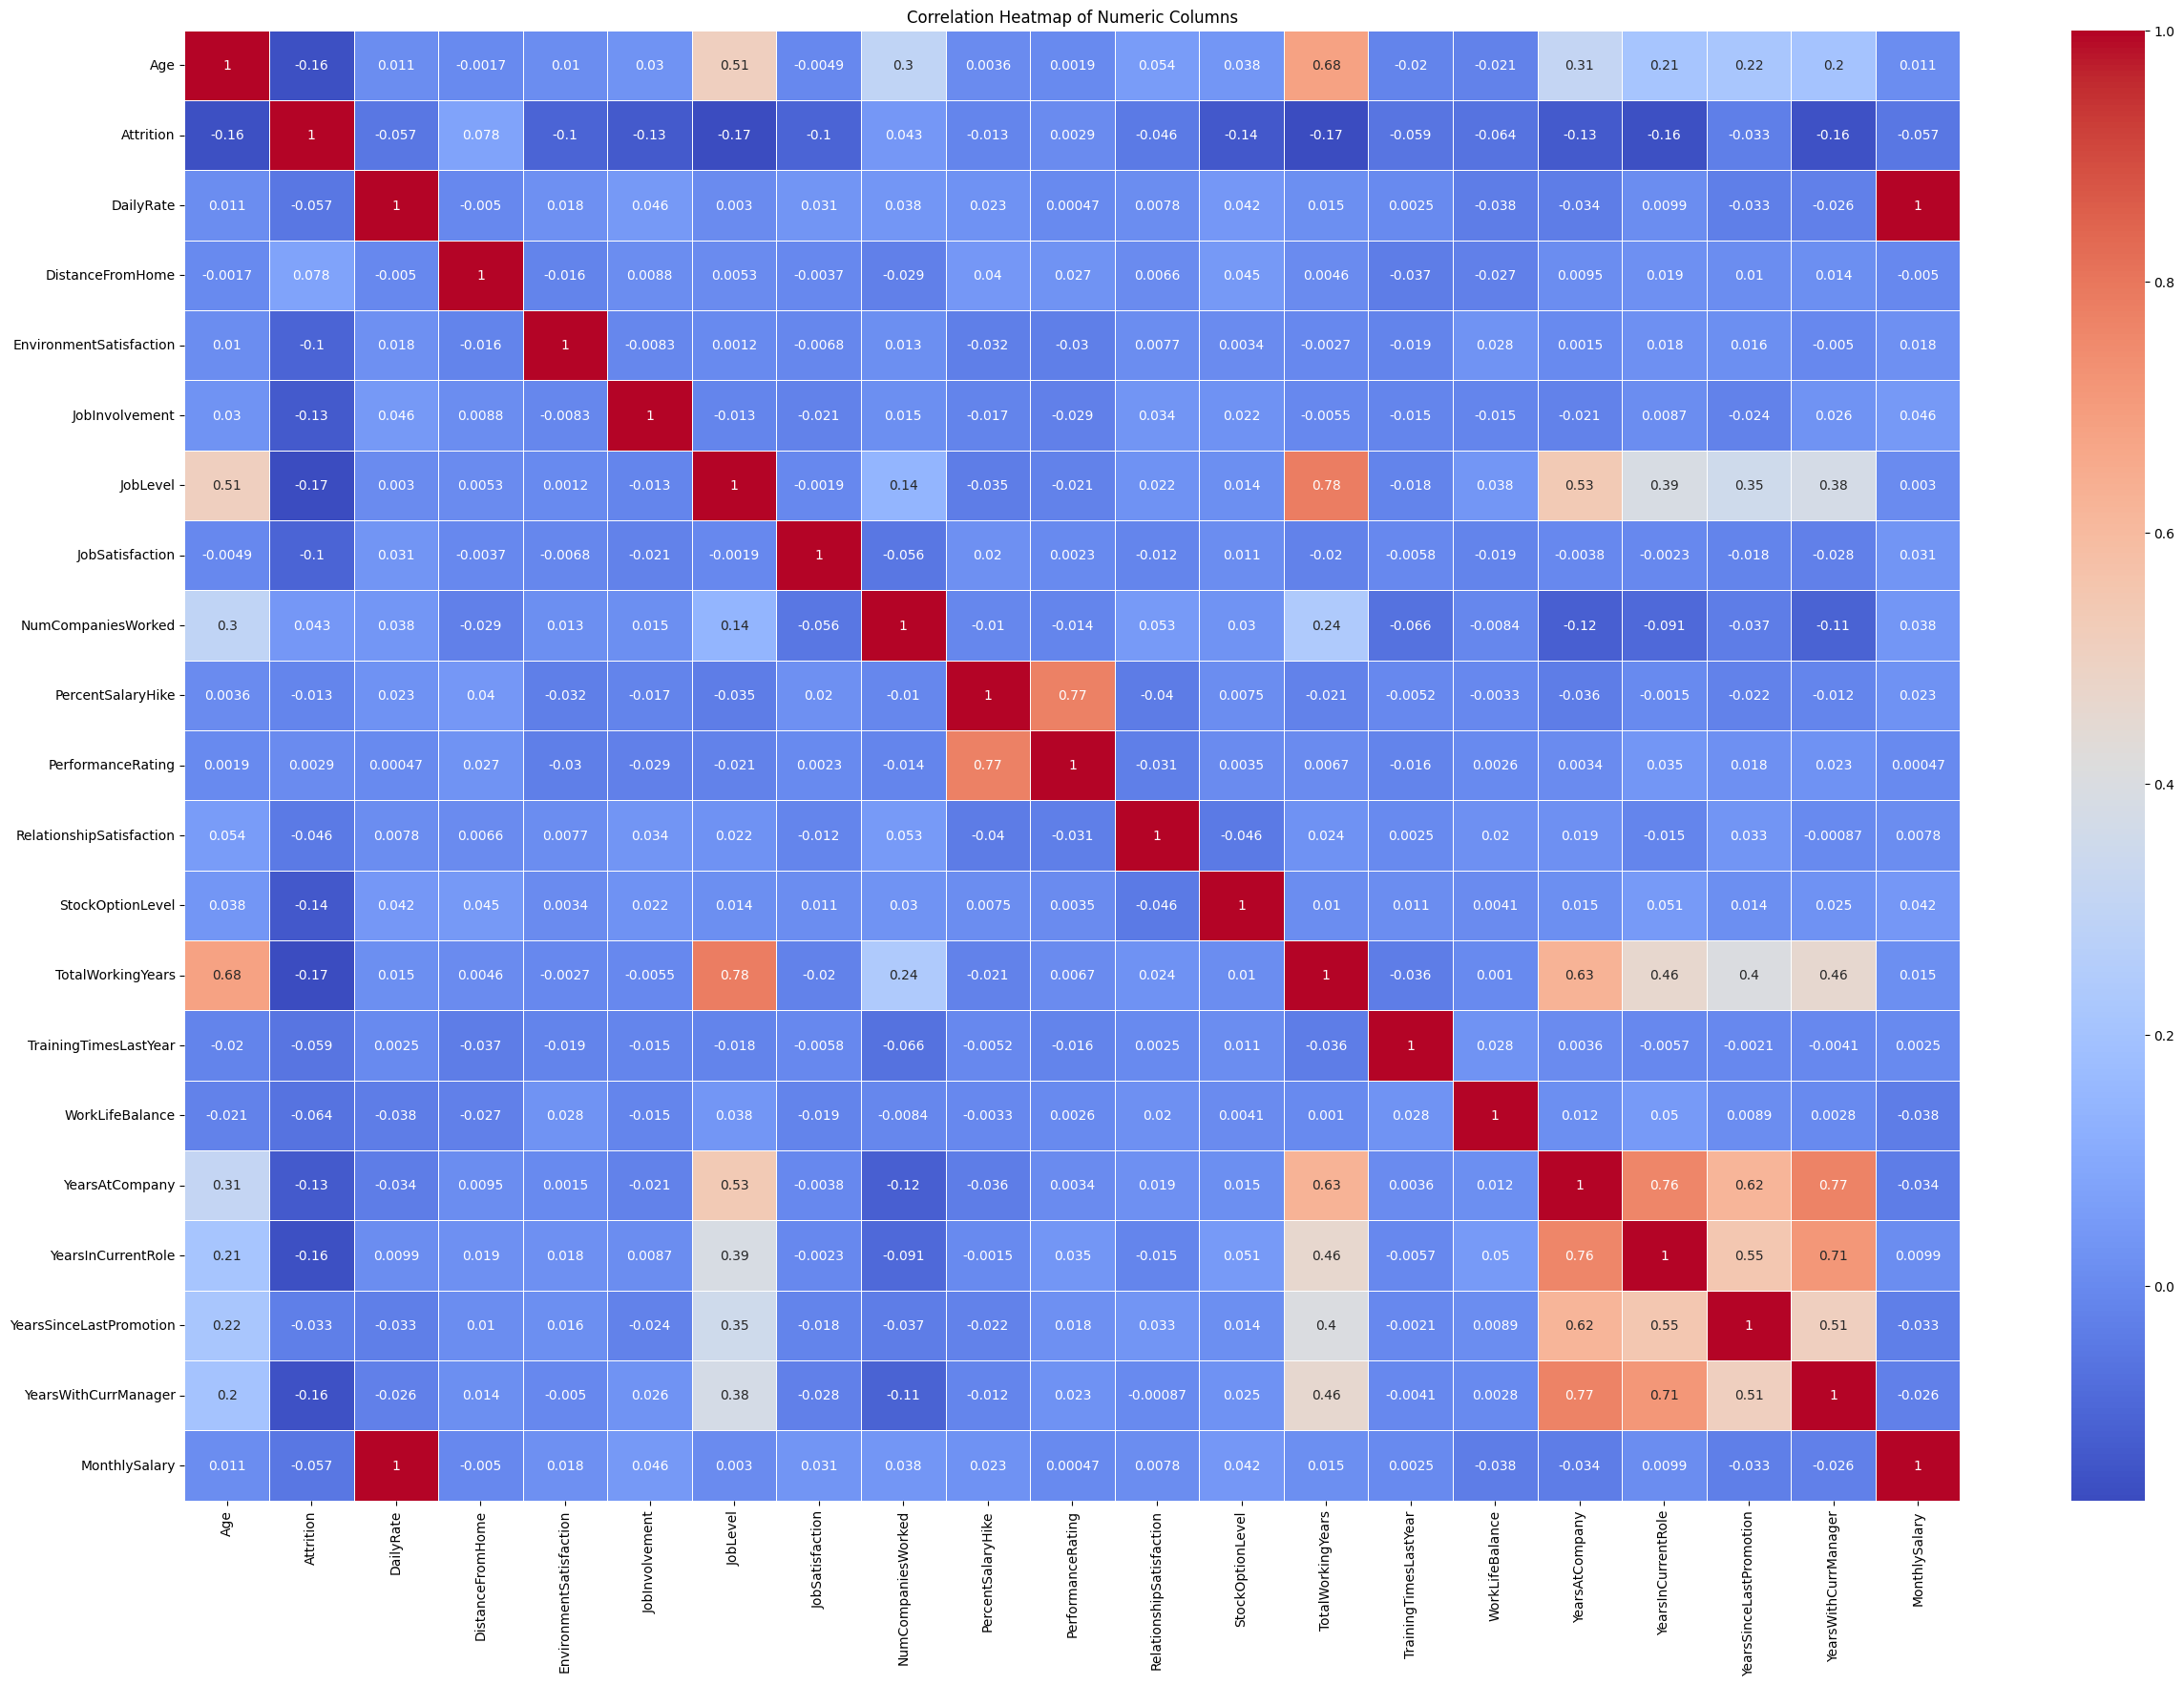

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create a copy of the dataframe
df_employee_copy = df_employee.copy()

# Step 2: Convert the 'Attrition' column to numeric in the copied dataframe
df_employee_copy['Attrition'] = df_employee_copy['Attrition'].map({'Yes': 1, 'No': 0})

# Step 3: Select numeric columns including the newly converted 'Attrition'
numeric_columns = df_employee_copy.select_dtypes(include=['int64', 'float64'])

# Step 4: Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_columns.corr()

# Step 5: Plot the heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()


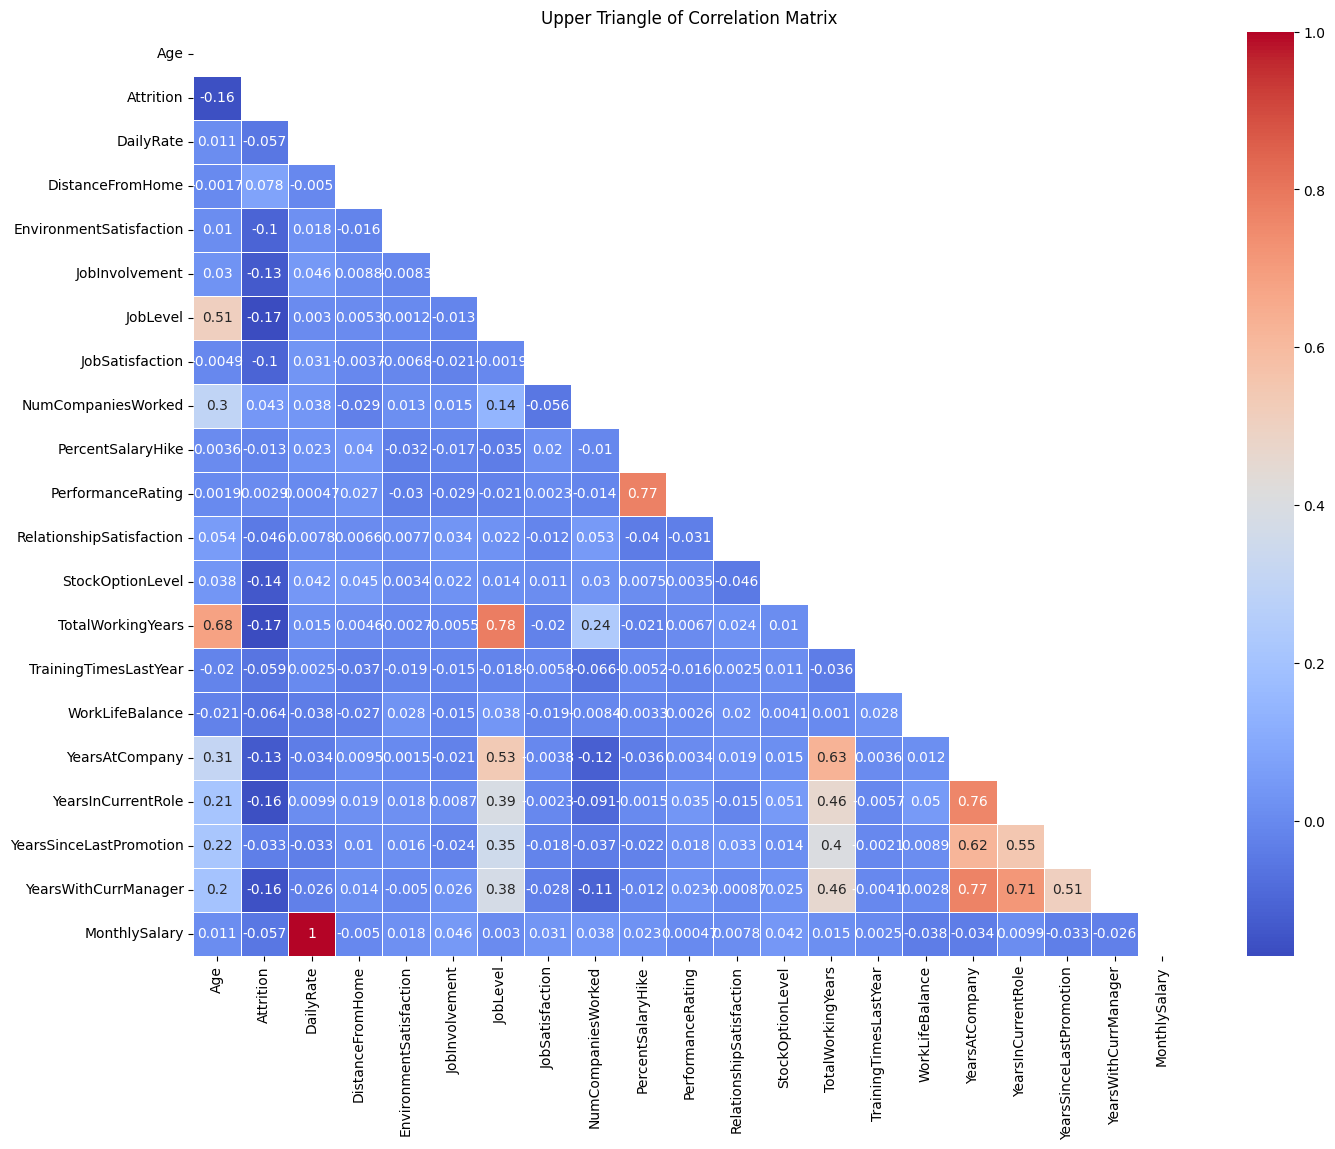

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Create the correlation matrix from numeric columns
correlation_matrix = numeric_columns.corr()

# Step 2: Select the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Step 3: Plot the heatmap with the mask to show only the upper triangle
plt.figure(figsize=(16, 12))  # Adjust the size if necessary
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Upper Triangle of Correlation Matrix')
plt.show()


**Train-Test Split**

In [76]:
from sklearn.model_selection import train_test_split

# Step 1: Separate features (X) and target (y)
X = df_employee.drop(columns=['Attrition','Gender','Education','DailyRate','JobLevel','PercentSalaryHike','PerformanceRating','NumCompaniesWorked',
                             'RelationshipSatisfaction','YearsInCurrentRole','YearsWithCurrManager','YearsInCurrentRole','YearsSinceLastPromotion']) 
y = df_employee['Attrition']

# Step 2: Split the dataset into training and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Now, X_train and y_train are the training features and target,
# and X_test and y_test are the testing features and target.


**Data Preprocessing**

In [77]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(X_train[['BusinessTravel', 'Department', 'JobRole', 'MaritalStatus', 'OverTime']])
X_train_cat_np = ohe.transform(X_train[['BusinessTravel', 'Department', 'JobRole', 'MaritalStatus', 'OverTime']])
X_train_cat_np

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [78]:
#converting the numpy array of train data set to dataframe
X_train_cat_df = pd.DataFrame(X_train_cat_np, columns=ohe.get_feature_names_out(), index=X_train.index)
X_train_cat_df


,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
1374,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1092,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
768,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
569,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
911,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
835,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1216,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
559,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [79]:
#Applying One-Hot-Encoder transfrom to test set
X_test_cat_np = ohe.transform(X_test[['BusinessTravel', 'Department','JobRole', 'MaritalStatus', 'OverTime']])
X_test_cat_np

array([[1., 0., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [80]:
#converting the test data numpy array to dataframe
X_test_cat_df = pd.DataFrame(X_test_cat_np, columns=ohe.get_feature_names_out(), index=X_test.index)
X_test_cat_df

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
442,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1091,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
981,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
785,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1332,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
481,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
124,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
198,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [81]:
#Calculating the numerical columns for the train set.
numerical_columns = X_train.select_dtypes(exclude=['object']).columns
print(numerical_columns)


Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'MonthlySalary'],
      dtype='object')


In [82]:
#Apply MinMaxScaler to the numerical columns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
normalizer = MinMaxScaler()
normalizer.fit(X_train[numerical_columns])


MinMaxScaler()

In [83]:
#Applying normalizer to train and test dataset
X_train_num_np = normalizer.transform(X_train[numerical_columns])
X_test_num_np = normalizer.transform(X_test[numerical_columns])

In [84]:
#Convert the scaled numerical data to a DataFrame
X_train_num_df = pd.DataFrame(X_train_num_np, columns=numerical_columns, index=X_train.index)
X_test_num_df = pd.DataFrame(X_test_num_np, columns=numerical_columns, index=X_test.index)


In [85]:
display(X_train_num_df)

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,MonthlySalary
1374,0.952381,0.714286,1.000000,0.666667,1.000000,0.333333,0.725,0.333333,0.333333,0.025,0.359140
1092,0.642857,0.964286,1.000000,0.666667,1.000000,0.333333,0.200,0.500000,0.666667,0.125,0.606452
768,0.523810,0.892857,0.666667,0.666667,0.000000,0.333333,0.200,0.500000,0.333333,0.175,0.140502
569,0.428571,0.250000,0.000000,0.333333,0.000000,0.000000,0.250,0.166667,0.666667,0.250,0.953405
911,0.166667,0.821429,0.666667,0.000000,1.000000,0.000000,0.025,0.666667,0.666667,0.025,0.354839
...,...,...,...,...,...,...,...,...,...,...,...
763,0.380952,0.321429,0.666667,0.666667,0.666667,0.333333,0.025,0.333333,0.666667,0.025,0.881004
835,0.404762,0.250000,0.666667,0.666667,0.666667,0.000000,0.150,0.333333,0.000000,0.125,0.303943
1216,0.595238,0.035714,1.000000,0.666667,1.000000,0.333333,0.250,0.500000,0.666667,0.250,0.770609
559,0.476190,0.035714,1.000000,0.666667,0.666667,0.333333,0.150,0.000000,0.000000,0.025,0.117563


In [86]:
display(X_test_num_df)

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,MonthlySalary
442,0.428571,0.321429,0.333333,0.666667,1.000000,0.000000,0.250,0.500000,0.333333,0.250,0.380645
1091,0.357143,0.857143,1.000000,0.333333,0.333333,0.000000,0.125,0.333333,0.666667,0.125,0.337634
981,0.404762,0.607143,1.000000,0.666667,0.666667,0.333333,0.125,0.000000,0.333333,0.100,0.400000
785,0.523810,0.678571,0.000000,0.666667,1.000000,0.333333,0.350,1.000000,0.666667,0.275,0.994982
1332,0.261905,0.821429,1.000000,0.333333,1.000000,0.000000,0.025,0.500000,0.333333,0.025,0.254480
...,...,...,...,...,...,...,...,...,...,...,...
1439,0.428571,0.071429,0.000000,0.333333,1.000000,0.666667,0.250,0.333333,0.666667,0.225,0.324731
481,0.380952,0.000000,0.333333,0.333333,1.000000,0.333333,0.150,0.500000,0.666667,0.150,0.107527
124,0.309524,0.178571,0.333333,0.000000,0.666667,0.000000,0.300,0.500000,0.333333,0.175,0.103943
198,0.476190,0.035714,1.000000,0.666667,0.666667,0.000000,0.350,0.500000,0.666667,0.025,0.829391


In [87]:
#Use pd.concat to merge the numerical and categorical DataFrames
X_train_final = pd.concat([X_train_num_df, X_train_cat_df], axis=1)
X_test_final = pd.concat([X_test_num_df, X_test_cat_df], axis=1)

In [88]:
#check for the nulls in the train dataframe
X_train_final.isna().sum()

Age                                  0
DistanceFromHome                     0
EnvironmentSatisfaction              0
JobInvolvement                       0
JobSatisfaction                      0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
MonthlySalary                        0
BusinessTravel_Non-Travel            0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Human Resources           0
Department_Research & Development    0
Department_Sales                     0
JobRole_Healthcare Representative    0
JobRole_Human Resources              0
JobRole_Laboratory Technician        0
JobRole_Manager                      0
JobRole_Manufacturing Director       0
JobRole_Research Director            0
JobRole_Research Scientist           0
JobRole_Sales Executive              0
JobRole_Sales Representat

In [89]:
X_train_final.shape

(1176, 31)

In [90]:
#check for the nulls in test dataframe
X_test_final.isna().sum()

Age                                  0
DistanceFromHome                     0
EnvironmentSatisfaction              0
JobInvolvement                       0
JobSatisfaction                      0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
MonthlySalary                        0
BusinessTravel_Non-Travel            0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Human Resources           0
Department_Research & Development    0
Department_Sales                     0
JobRole_Healthcare Representative    0
JobRole_Human Resources              0
JobRole_Laboratory Technician        0
JobRole_Manager                      0
JobRole_Manufacturing Director       0
JobRole_Research Director            0
JobRole_Research Scientist           0
JobRole_Sales Executive              0
JobRole_Sales Representat

In [91]:
X_test_final.shape

(294, 31)

In [92]:
display(X_test_final)

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
442,0.428571,0.321429,0.333333,0.666667,1.000000,0.000000,0.250,0.500000,0.333333,0.250,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1091,0.357143,0.857143,1.000000,0.333333,0.333333,0.000000,0.125,0.333333,0.666667,0.125,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
981,0.404762,0.607143,1.000000,0.666667,0.666667,0.333333,0.125,0.000000,0.333333,0.100,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
785,0.523810,0.678571,0.000000,0.666667,1.000000,0.333333,0.350,1.000000,0.666667,0.275,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1332,0.261905,0.821429,1.000000,0.333333,1.000000,0.000000,0.025,0.500000,0.333333,0.025,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,0.428571,0.071429,0.000000,0.333333,1.000000,0.666667,0.250,0.333333,0.666667,0.225,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
481,0.380952,0.000000,0.333333,0.333333,1.000000,0.333333,0.150,0.500000,0.666667,0.150,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
124,0.309524,0.178571,0.333333,0.000000,0.666667,0.000000,0.300,0.500000,0.333333,0.175,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
198,0.476190,0.035714,1.000000,0.666667,0.666667,0.000000,0.350,0.500000,0.666667,0.025,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


**Model Selection and Evaluation**

- K-Nearest Neighbors (KNN) Model

Accuracy: 0.8333333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.90       245
           1       0.50      0.27      0.35        49

    accuracy                           0.83       294
   macro avg       0.68      0.61      0.63       294
weighted avg       0.80      0.83      0.81       294

ROC-AUC Score: 0.66

Confusion Matrix:
 [[232  13]
 [ 36  13]]


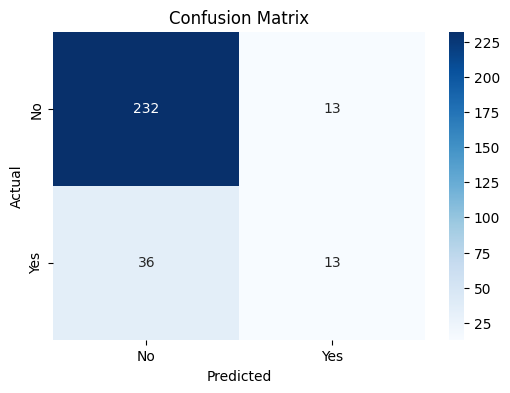

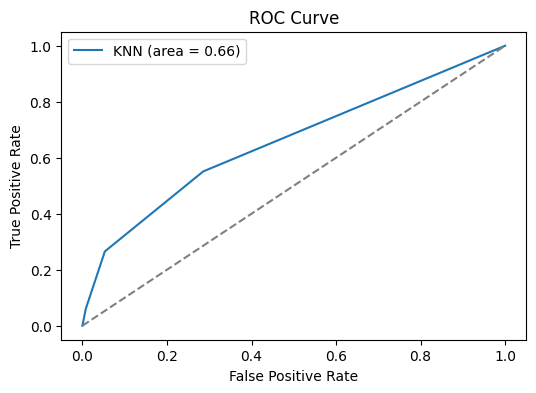

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to y_train and y_test directly
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test) 

# Initialize the KNN classifier (choose k=3 as an example, can be tuned)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train_final, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test_final)
y_pred_proba_knn = knn.predict_proba(X_test_final)[:, 1]  # Probability estimates for ROC-AUC

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Classification report (includes precision, recall, F1-score)
class_report_knn = classification_report(y_test, y_pred_knn)

# Confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# ROC-AUC score
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn)
roc_auc_knn_rounded = round(roc_auc_knn, 2)  # Rounds to 2 decimal places

# Print the results
print("Accuracy:", accuracy_knn)
print("\nClassification Report:\n", class_report_knn)
print("ROC-AUC Score:", roc_auc_knn_rounded)
print("\nConfusion Matrix:\n", conf_matrix_knn)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
# Save the confusion matrix to the 'figures' folder
plt.savefig('../figures/confusion_matrix_knn.png', dpi=300)  # Save to the 'figures' directory
plt.close() 

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_knn)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'KNN (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
plt.savefig('../figures/roc_curve_knn.png', dpi=300)  # Save to the 'figures' directory
plt.close()
# import warnings
# warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.metrics._regression")



Best Parameters: {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
Best Cross-Validation Cohen's Kappa: 0.2614
Cohen's Kappa on Test Set: 0.2865

Accuracy: 0.8503401360544217

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       245
           1       0.63      0.24      0.35        49

    accuracy                           0.85       294
   macro avg       0.75      0.61      0.63       294
weighted avg       0.83      0.85      0.82       294


ROC-AUC Score: 0.6564764681382758

Confusion Matrix:
 [[238   7]
 [ 37  12]]


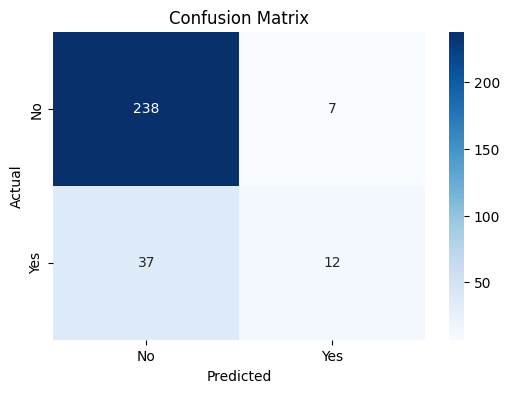

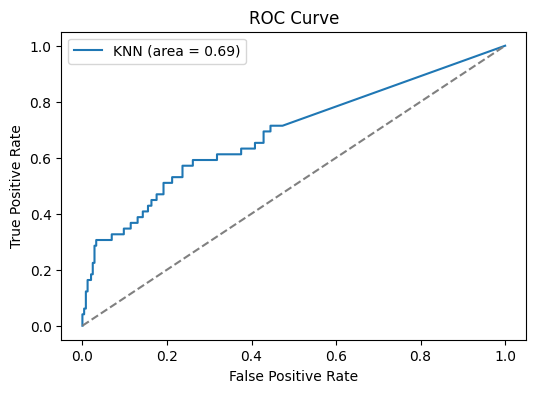

In [94]:
#KNN with Grid Search CV using Cohen's Kappa for class imbalance and checking the model's performance.
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, cohen_kappa_score, make_scorer


# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 for Manhattan, p=2 for Euclidean
}

# Create a custom scorer using Cohen's Kappa
kappa_scorer_knn = make_scorer(cohen_kappa_score, greater_is_better=True)

# Initialize KNN model
knn = KNeighborsClassifier()

# Initialize GridSearchCV with Cohen's Kappa as the scoring metric
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring=kappa_scorer_knn, n_jobs=-1)

# Fit the model with grid search
grid_search_knn.fit(X_train_final, y_train)

# Get the best parameters and the best score
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print(f"Best Parameters: {best_params_knn}")
print(f"Best Cross-Validation Cohen's Kappa: {best_score_knn:.4f}")

# Make predictions on the test set with the best model
best_knn = grid_search_knn.best_estimator_
y_pred_knn_grid = best_knn.predict(X_test_final)
y_pred_proba_knn_grid = best_knn.predict_proba(X_test_final)[:, 1]  # Probabilities for the positive class

# Evaluation metrics on test data using Cohen's Kappa
kappa_test_score_knn = cohen_kappa_score(y_test, y_pred_knn_grid)
print(f"Cohen's Kappa on Test Set: {kappa_test_score_knn:.4f}")

# Calculate accuracy
accuracy_knn_grid = accuracy_score(y_test, y_pred_knn_grid)

# Classification report (includes precision, recall, F1-score)
class_report_knn_grid = classification_report(y_test, y_pred_knn_grid)

# Confusion matrix
conf_matrix_knn_grid = confusion_matrix(y_test, y_pred_knn_grid)

# ROC-AUC score
roc_auc_knn_grid = roc_auc_score(y_test, y_pred_proba_knn_grid)


# Print the results
print("\nAccuracy:", accuracy_knn_grid)
print("\nClassification Report:\n", class_report_knn_grid)
print("\nROC-AUC Score:", roc_auc_knn)
print("\nConfusion Matrix:\n", conf_matrix_knn_grid)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_knn_grid, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Save the confusion matrix to the 'figures' folder
plt.savefig('../figures/confusion_matrix_knn_grid.png', dpi=300)  # Save to the 'figures' directory
plt.close() 

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_knn_grid)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'KNN (area = {roc_auc_knn_grid:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



# Regression metrics

R2
MAE
RMSE

# Classification metrics

Accuracy -> [0,1]
Precision -> [0,1]
Recall -> [0,1]
F1-Score -> [0,1]
Cohen's Kappa score  -> [-1,1] (the higher, the better. A minimum good value is around 0.65)
confussion-matrix
ROC
AUC -> [0,1]

- Logistic Regression Model

Cohen's Kappa (Logistic Regression): 0.44

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       245
           1       0.94      0.33      0.48        49

    accuracy                           0.88       294
   macro avg       0.91      0.66      0.71       294
weighted avg       0.89      0.88      0.86       294

ROC-AUC Score (Logistic Regression): 0.66

Confusion Matrix (Logistic Regression):
 [[244   1]
 [ 33  16]]


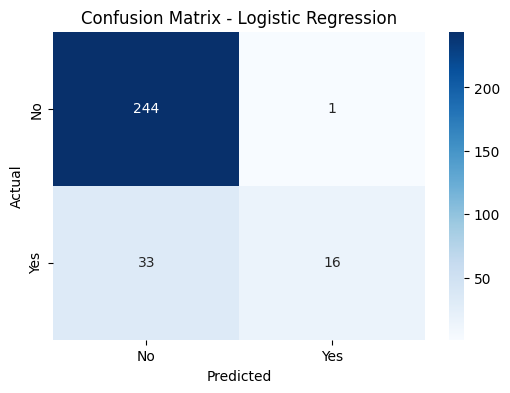

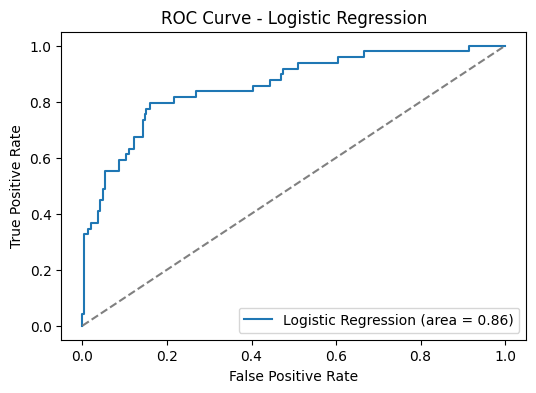

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train_final, y_train)

# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test_final)
y_pred_proba_logreg = logreg.predict_proba(X_test_final)[:, 1]  # Probability estimates for ROC-AUC

# Calculate accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# Classification report (includes precision, recall, F1-score)
class_report_logreg = classification_report(y_test, y_pred_logreg)

# Confusion matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# ROC-AUC score
roc_auc_logreg = roc_auc_score(y_test, y_pred_proba_logreg)
roc_auc_logreg_rounded = round(roc_auc_knn, 2)


# Calculate Cohen's Kappa
kappa_logreg = cohen_kappa_score(y_test, y_pred_logreg)
kappa_logreg_rounded = round(kappa_logreg, 2)
# Print the Cohen's Kappa result
print("Cohen's Kappa (Logistic Regression):", kappa_logreg_rounded)

# Print the results
print("\nClassification Report (Logistic Regression):\n", class_report_logreg)
print("ROC-AUC Score (Logistic Regression):", roc_auc_logreg_rounded)
print("\nConfusion Matrix (Logistic Regression):\n", conf_matrix_logreg)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()
plt.savefig('../figures/confusion_matrix_logreg.png', dpi=300)  # Save to the 'figures' directory
plt.close()

# ROC Curve
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_pred_proba_logreg)
plt.figure(figsize=(6, 4))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (area = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()
plt.savefig('../figures/roc_curve_logreg.png', dpi=300)  # Save to the 'figures' directory
plt.close()



- Random Forest

Random Forest Accuracy: 0.8469387755102041

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       245
           1       0.61      0.22      0.33        49

    accuracy                           0.85       294
   macro avg       0.74      0.60      0.62       294
weighted avg       0.82      0.85      0.82       294

Random Forest ROC-AUC Score: 0.7982090795501875

Random Forest Confusion Matrix:
 [[238   7]
 [ 38  11]]


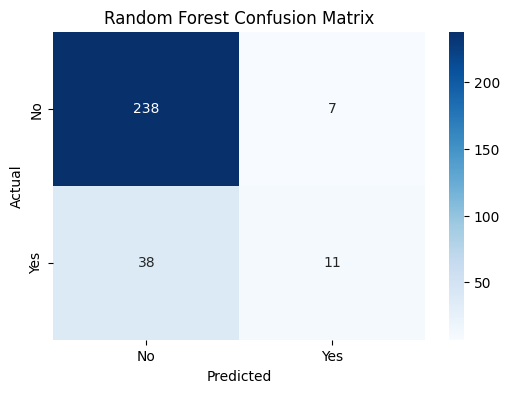

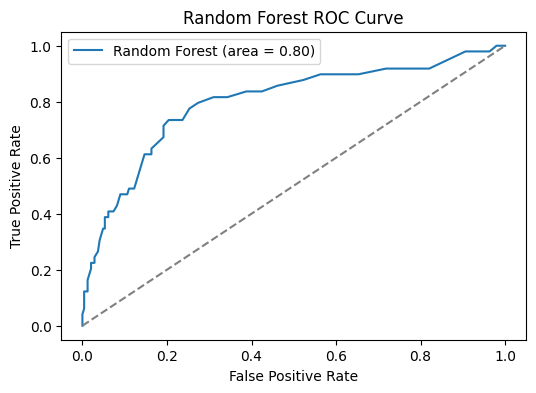

In [96]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can tune the number of trees (n_estimators)

# Train the model
rf_classifier.fit(X_train_final, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test_final)
y_pred_proba_rf = rf_classifier.predict_proba(X_test_final)[:, 1]  # Probability estimates for ROC-AUC

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Classification report (includes precision, recall, F1-score)
class_report_rf = classification_report(y_test, y_pred_rf)

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# ROC-AUC score
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Print the results
print("Random Forest Accuracy:", accuracy_rf)
print("\nRandom Forest Classification Report:\n", class_report_rf)
print("Random Forest ROC-AUC Score:", roc_auc_rf)
print("\nRandom Forest Confusion Matrix:\n", conf_matrix_rf)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Random Forest Confusion Matrix')
plt.show()
plt.savefig('../figures/confusion_matrix_rf.png', dpi=300)  # Save to the 'figures' directory
plt.close()

# ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.show()
plt.savefig('../figures/roc_curve_rf.png', dpi=300)  # Save to the 'figures' directory
plt.close()


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters for Random Forest:
{'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest Cohen's Kappa Score: 0.3

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       245
           1       0.71      0.24      0.36        49

    accuracy                           0.86       294
   macro avg       0.79      0.61      0.64       294
weighted avg       0.84      0.86      0.83       294

Random Forest ROC-AUC Score: 0.79

Random Forest Confusion Matrix:
 [[240   5]
 [ 37  12]]


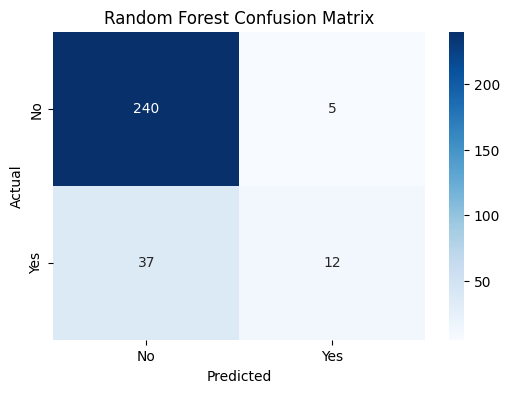

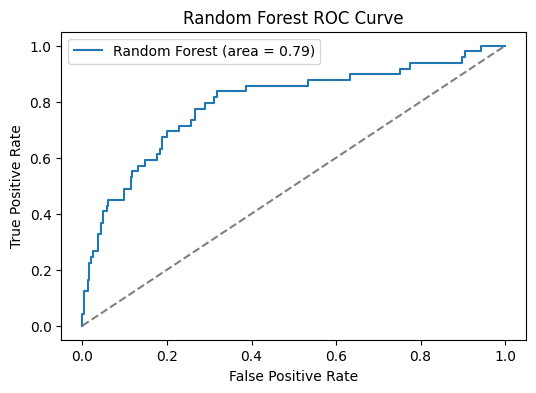

In [97]:
#Random Forest Classifier with Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score, make_scorer

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],           # Number of trees in the forest
    'max_depth': [10, 20, 30, None],           # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples to be at a leaf node
    'bootstrap': [True, False]                 # Whether bootstrap samples are used
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define a custom scoring function using Cohen's Kappa
kappa_scorer_rf = make_scorer(cohen_kappa_score,greater_is_better =True)

# Initialize GridSearchCV with cross-validation (5-fold CV) and Cohen's Kappa as the scoring metric
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring=kappa_scorer_rf, verbose=2, n_jobs=-1)

# Perform grid search on training data
grid_search_rf.fit(X_train_final, y_train)

# Get the best estimator from the grid search
best_rf = grid_search_rf.best_estimator_

# Print the best parameters from the grid search
print("Best Parameters for Random Forest:")
print(grid_search_rf.best_params_)

# Make predictions on the test set with the best model
y_pred_rf = best_rf.predict(X_test_final)
y_pred_proba_rf = best_rf.predict_proba(X_test_final)[:, 1]  # Probability estimates for ROC-AUC

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Cohen's Kappa Score on test set
kappa_rf = cohen_kappa_score(y_test, y_pred_rf)
kappa_rf_rounded = round(kappa_rf, 2)


# Classification report (includes precision, recall, F1-score)
class_report_rf = classification_report(y_test, y_pred_rf)

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# ROC-AUC score
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
roc_auc_rf_rounded = round(roc_auc_rf, 2)


# Print the results
print("Random Forest Cohen's Kappa Score:", kappa_rf_rounded)
print("\nRandom Forest Classification Report:\n", class_report_rf)
print("Random Forest ROC-AUC Score:", roc_auc_rf_rounded)
print("\nRandom Forest Confusion Matrix:\n", conf_matrix_rf)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Random Forest Confusion Matrix')
plt.show()
plt.savefig('../figures/confusion_matrix_rf_gridsearch.png', dpi=300)  # Save to the 'figures' directory
plt.close()

# ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.show()
plt.savefig('../figures/roc_curve_rf_gridsearch.png', dpi=300)  # Save to the 'figures' directory
plt.close()


- XGboost Model

XGBoost Accuracy: 0.8435374149659864

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       245
           1       0.56      0.31      0.39        49

    accuracy                           0.84       294
   macro avg       0.71      0.63      0.65       294
weighted avg       0.82      0.84      0.82       294

XGBoost ROC-AUC Score: 0.7735110370678883

XGBoost Confusion Matrix:
 [[233  12]
 [ 34  15]]


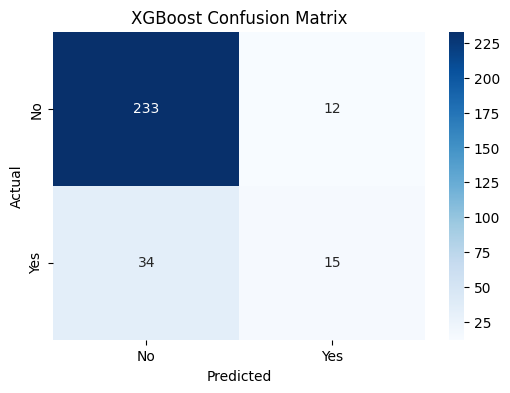

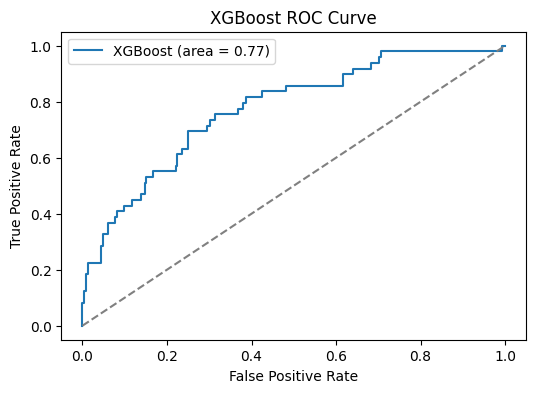

In [98]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_classifier.fit(X_train_final, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test_final)
y_pred_proba_xgb = xgb_classifier.predict_proba(X_test_final)[:, 1]  # Probability estimates for ROC-AUC

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Classification report (includes precision, recall, F1-score)
class_report_xgb = classification_report(y_test, y_pred_xgb)

# Confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# ROC-AUC score
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# Print the results
print("XGBoost Accuracy:", accuracy_xgb)
print("\nXGBoost Classification Report:\n", class_report_xgb)
print("XGBoost ROC-AUC Score:", roc_auc_xgb)
print("\nXGBoost Confusion Matrix:\n", conf_matrix_xgb)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('XGBoost Confusion Matrix')
plt.show()

# ROC Curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)
plt.figure(figsize=(6, 4))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend()
plt.show()


- AdaBoost Classifier Model

AdaBoost Accuracy: 0.8469387755102041

AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       245
           1       0.57      0.35      0.43        49

    accuracy                           0.85       294
   macro avg       0.72      0.65      0.67       294
weighted avg       0.83      0.85      0.83       294

AdaBoost ROC-AUC Score: 0.8010828821324448

AdaBoost Confusion Matrix:
 [[232  13]
 [ 32  17]]


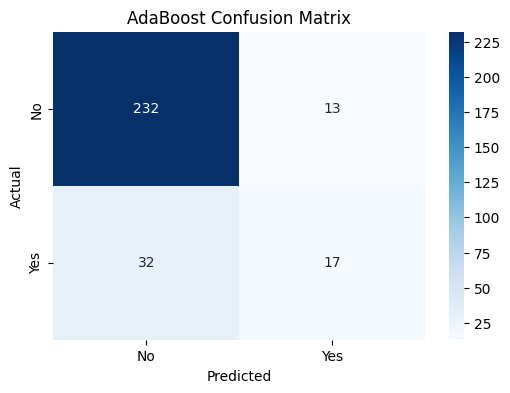

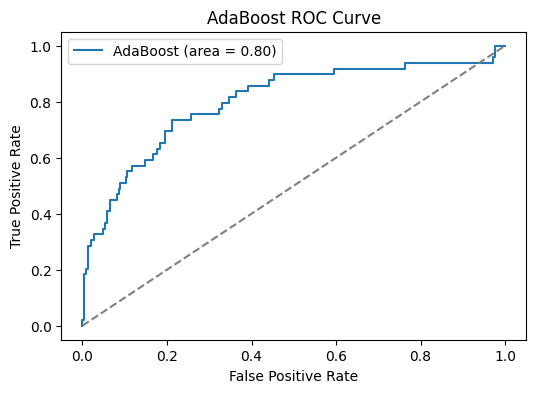

In [99]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the AdaBoost classifier
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the AdaBoost model
ada_classifier.fit(X_train_final, y_train)

# Make predictions on the test set
y_pred_ada = ada_classifier.predict(X_test_final)
y_pred_proba_ada = ada_classifier.predict_proba(X_test_final)[:, 1]  # Probability estimates for ROC-AUC

# Calculate accuracy
accuracy_ada = accuracy_score(y_test, y_pred_ada)

# Classification report (includes precision, recall, F1-score)
class_report_ada = classification_report(y_test, y_pred_ada)

# Confusion matrix
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)

# ROC-AUC score
roc_auc_ada = roc_auc_score(y_test, y_pred_proba_ada)

# Print the results
print("AdaBoost Accuracy:", accuracy_ada)
print("\nAdaBoost Classification Report:\n", class_report_ada)
print("AdaBoost ROC-AUC Score:", roc_auc_ada)
print("\nAdaBoost Confusion Matrix:\n", conf_matrix_ada)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_ada, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('AdaBoost Confusion Matrix')
plt.show()

# ROC Curve
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, y_pred_proba_ada)
plt.figure(figsize=(6, 4))
plt.plot(fpr_ada, tpr_ada, label=f'AdaBoost (area = {roc_auc_ada:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC Curve')
plt.legend()
plt.show()


In [100]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import make_scorer, cohen_kappa_score
from sklearn.model_selection import GridSearchCV

# Define a custom scorer using Cohen's Kappa
kappa_scorer_ada = make_scorer(cohen_kappa_score, greater_is_better=True)

# Initialize the AdaBoost classifier
ada_model = AdaBoostClassifier(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],      # Number of estimators
    'learning_rate': [0.01, 0.1, 1.0]    # Learning rate for AdaBoost
}

# Set up GridSearchCV with Cohen's Kappa as the scoring metric
grid_search_ada = GridSearchCV(
    estimator=ada_model,
    param_grid=param_grid,
    scoring=kappa_scorer_ada,  # Cohen's Kappa as the scoring metric
    cv=5,                  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1              # Use all available cores
)

# Fit the GridSearchCV on the training data
grid_search_ada.fit(X_train_final, y_train)

# Get the best parameters and best Cohen's Kappa score
best_params_ada = grid_search_ada.best_params_
best_kappa_ada = grid_search_ada.best_score_

print(f"Best Parameters for AdaBoost: {best_params_ada}")
print(f"Best Cohen's Kappa Score: {best_kappa_ada}")

# Train the best model on the full training data
best_ada_model = grid_search_ada.best_estimator_

# Make predictions on the test set
y_pred_best_ada = best_ada_model.predict(X_test_final)
y_pred_proba_best_ada = best_ada_model.predict_proba(X_test_final)[:, 1]

# Evaluate the best model (you can use similar metrics as before)
accuracy_best_ada = accuracy_score(y_test, y_pred_best_ada)
roc_auc_best_ada = roc_auc_score(y_test, y_pred_proba_best_ada)

print(f"AdaBoost Best Model Accuracy: {accuracy_best_ada}")
print(f"AdaBoost Best Model ROC-AUC: {roc_auc_best_ada}")


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters for AdaBoost: {'learning_rate': 1.0, 'n_estimators': 100}
Best Cohen's Kappa Score: 0.4500016823618064
AdaBoost Best Model Accuracy: 0.8469387755102041
AdaBoost Best Model ROC-AUC: 0.8010828821324448


Fitting 5 folds for each of 6561 candidates, totalling 32805 fits
Best Parameters for XGBoost:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'reg_alpha': 0.5, 'reg_lambda': 1.5, 'subsample': 0.8}
XGBoost Cohen's Kappa Score (with Grid Search): 0.37

XGBoost Classification Report (with Grid Search):
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       245
           1       0.58      0.37      0.45        49

    accuracy                           0.85       294
   macro avg       0.73      0.66      0.68       294
weighted avg       0.83      0.85      0.84       294

XGBoost ROC-AUC Score (with Grid Search): 0.81

XGBoost Confusion Matrix (with Grid Search):
 [[232  13]
 [ 31  18]]


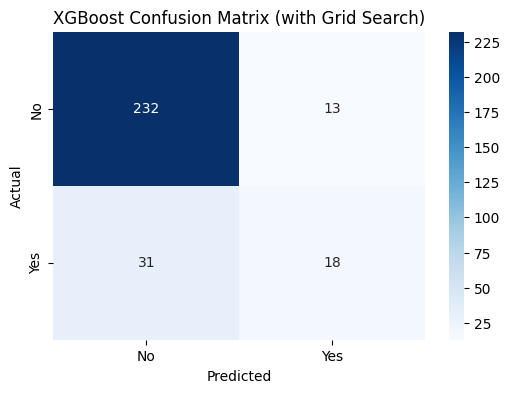

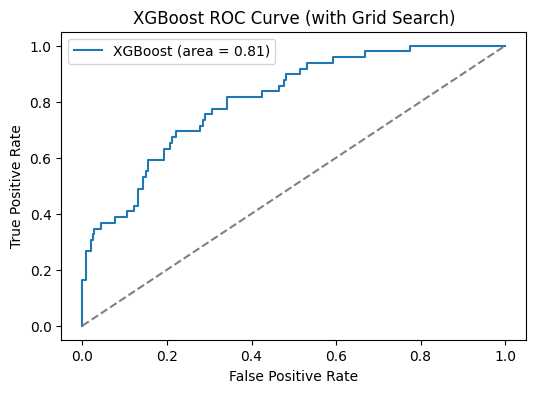

In [101]:
#XGBoost with Grid Search and Cohen's Kappa Scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score, make_scorer
import xgboost as xgb

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],         # Number of trees in the forest
    'max_depth': [3, 5, 7],                  # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],       # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],            # Subsample ratio of the training set
    'colsample_bytree': [0.6, 0.8, 1.0],     # Subsample ratio of columns
    'gamma': [0, 0.1, 0.2],                  # Minimum loss reduction required to make a further partition
    'reg_alpha': [0, 0.1, 0.5],              # L1 regularization term on weights
    'reg_lambda': [1, 1.5, 2.0]              # L2 regularization term on weights
}

# Define Cohen's Kappa scorer
kappa_scorer_xgb = make_scorer(cohen_kappa_score,greater_is_better=True)

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Initialize GridSearchCV with Cohen's Kappa as the scoring metric
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, 
                               cv=5, scoring=kappa_scorer_xgb, verbose=2, n_jobs=-1)

# Perform grid search on training data
grid_search_xgb.fit(X_train_final, y_train)

# Get the best estimator from the grid search
best_xgb = grid_search_xgb.best_estimator_

# Print the best parameters from the grid search
print("Best Parameters for XGBoost:")
print(grid_search_xgb.best_params_)

# Make predictions on the test set with the best model
y_pred_xgb = best_xgb.predict(X_test_final)
y_pred_proba_xgb = best_xgb.predict_proba(X_test_final)[:, 1]  # Probability estimates for ROC-AUC

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Calculate Cohen's Kappa Score
kappa_xgb = cohen_kappa_score(y_test, y_pred_xgb)
kappa_xgb_rounded = round(kappa_xgb,2)

# Classification report (includes precision, recall, F1-score)
class_report_xgb = classification_report(y_test, y_pred_xgb)

# Confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# ROC-AUC score
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
roc_auc_xgb_rounded = round(roc_auc_xgb,2)

# Print the results

print("XGBoost Cohen's Kappa Score (with Grid Search):", kappa_xgb_rounded)
print("\nXGBoost Classification Report (with Grid Search):\n", class_report_xgb)
print("XGBoost ROC-AUC Score (with Grid Search):", roc_auc_xgb_rounded)
print("\nXGBoost Confusion Matrix (with Grid Search):\n", conf_matrix_xgb)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('XGBoost Confusion Matrix (with Grid Search)')
plt.show()

# ROC Curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)
plt.figure(figsize=(6, 4))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (area = {roc_auc_xgb_rounded})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve (with Grid Search)')
plt.legend()
plt.show()


**Handling Class Imbalance**

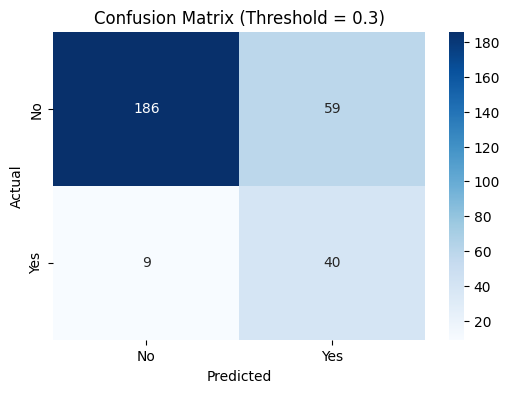

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.76      0.85       245
           1       0.40      0.82      0.54        49

    accuracy                           0.77       294
   macro avg       0.68      0.79      0.69       294
weighted avg       0.86      0.77      0.79       294

ROC AUC Score: 0.8576426488962933


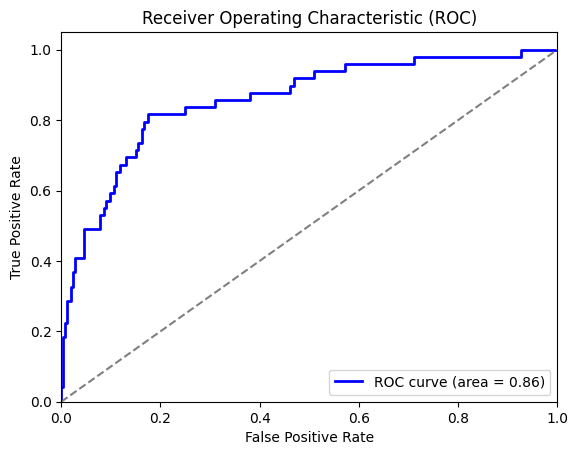

In [102]:
#Worked with Weights and Threshold to deal with class Imbalance
# Logistic Regression with balanced class weight
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_final, y_train)

# Get predicted probabilities
y_pred_proba_log_cl = model.predict_proba(X_test_final)[:, 1]

# Adjust the decision threshold (e.g., 0.5 for default threshold)
threshold = 0.5
y_pred_log_cl = np.where(y_pred_proba_log_cl >= threshold, 1, 0)

# Confusion Matrix
conf_matrix_log_cl = confusion_matrix(y_test, y_pred_log_cl)
# print("Confusion Matrix:")
# print(conf_matrix_log_cl)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_log_cl, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Threshold = 0.3)')
plt.show()

# Classification Report
class_report_log_cl = classification_report(y_test, y_pred_log_cl)
print("Classification Report:")
print(class_report_log_cl)

# ROC-AUC Score
roc_auc_log_cl = roc_auc_score(y_test, y_pred_proba_log_cl)
print(f"ROC AUC Score: {roc_auc_log_cl}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_log_cl)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_log_cl)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.78      0.86       245
           1       0.42      0.82      0.56        49

    accuracy                           0.78       294
   macro avg       0.69      0.80      0.71       294
weighted avg       0.87      0.78      0.81       294



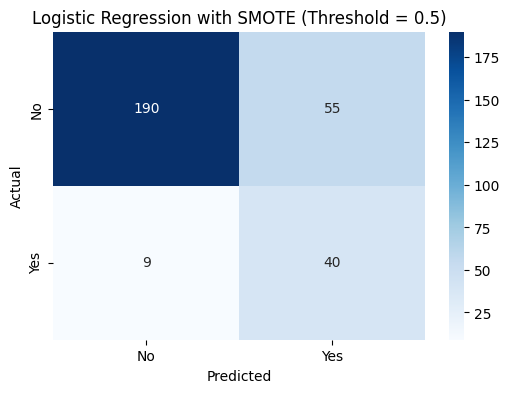

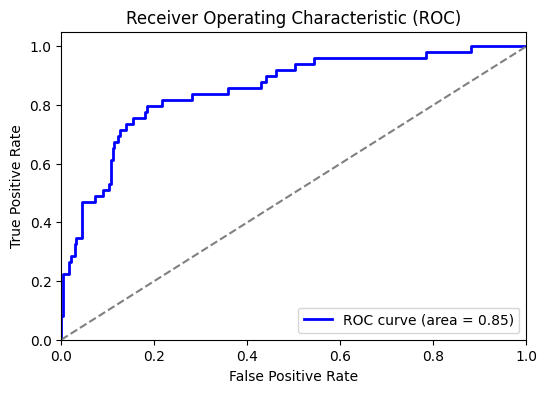

In [103]:
#Applying SMOTE to Logistic Regression Model
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train)

# Train Logistic Regression on resampled data
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Get predicted probabilities for class "Yes" (positive class)
y_pred_proba_log_smote = model.predict_proba(X_test_final)[:, 1]

# Adjust the decision threshold to 0.3
threshold = 0.5
y_pred_log_smote = np.where(y_pred_proba_log_smote >= threshold, 1, 0)

# Confusion Matrix
conf_matrix_log_smote = confusion_matrix(y_test, y_pred_log_smote)

# Print classification report

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_smote))

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_log_smote, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Logistic Regression with SMOTE (Threshold = 0.5)')
plt.show()

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_log_smote)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       245
           1       0.70      0.14      0.24        49

    accuracy                           0.85       294
   macro avg       0.78      0.57      0.58       294
weighted avg       0.83      0.85      0.80       294



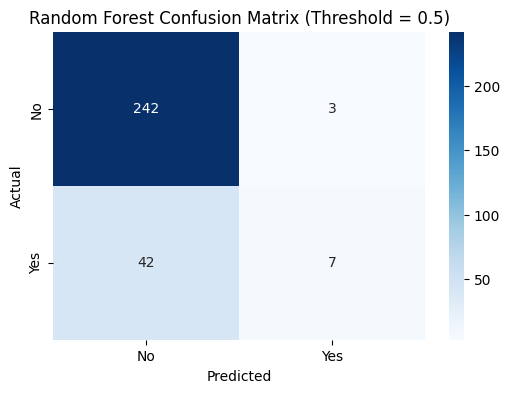

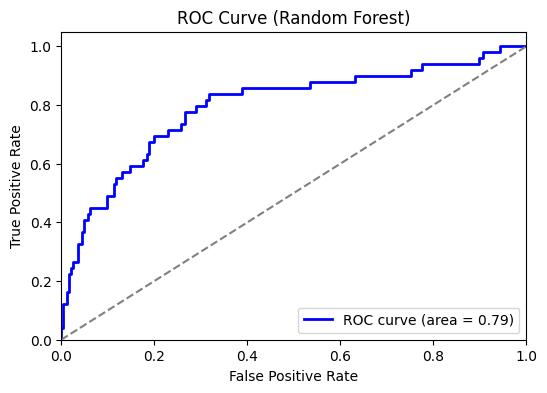

In [104]:
# Train Random Forest with class_weight='balanced'
rf_model = RandomForestClassifier(class_weight='balanced', random_state=0)
rf_model.fit(X_train_final, y_train)

# Get predicted probabilities for class "Yes" (positive class)
y_pred_proba_rf_cl = rf_model.predict_proba(X_test_final)[:, 1]

# Adjust threshold  (if needed)
threshold = 0.5
y_pred_rf_cl = np.where(y_pred_proba_rf_cl >= threshold, 1, 0)

# Confusion Matrix
conf_matrix_rf_cl = confusion_matrix(y_test, y_pred_rf_cl)

# Print classification report
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf_cl))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf_cl, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Random Forest Confusion Matrix (Threshold = 0.5)')
plt.show()

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(loc="lower right")
plt.show()



Class distribution in y_train: [988 188]

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       245
           1       0.45      0.57      0.50        49

    accuracy                           0.81       294
   macro avg       0.68      0.72      0.69       294
weighted avg       0.83      0.81      0.82       294



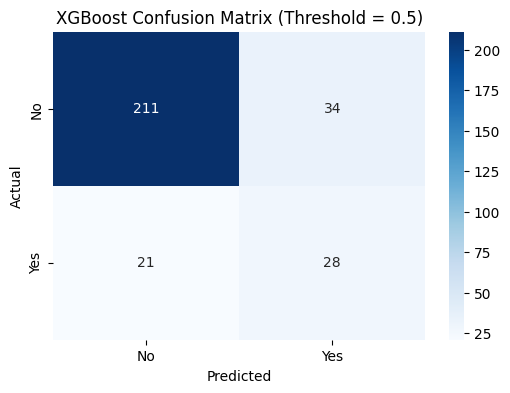

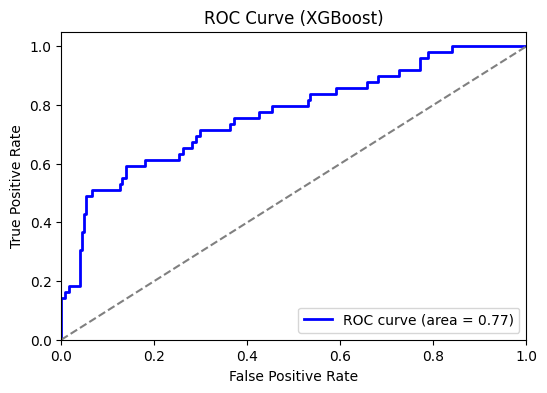

In [105]:
#Handling XGBoost with (scale_pos_weight)
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Check the class distribution in y_train
class_counts = np.bincount(y_train)
print("Class distribution in y_train:", class_counts)

# Calculate scale_pos_weight based on class imbalance in the training set
scale_pos_weight = class_counts[0] / class_counts[1]  # Majority class (0) / Minority class (1)

# Train XGBoost with scale_pos_weight
xgb_model_cl = XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model_cl.fit(X_train_final, y_train)

# Get predicted probabilities for class "Yes" (positive class)
y_pred_proba_xgb_cl = xgb_model_cl.predict_proba(X_test_final)[:, 1]

# Adjust threshold  (if needed)
threshold = 0.3
y_pred_xgb_cl = np.where(y_pred_proba_xgb_cl >= threshold, 1, 0)

# Confusion Matrix
conf_matrix_xgb_cl = confusion_matrix(y_test, y_pred_xgb_cl)

# Print classification report

print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb_cl))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_xgb_cl, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('XGBoost Confusion Matrix (Threshold = 0.5)')
plt.show()

# ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb_cl)
roc_auc_xgb_cl = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(6, 4))
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_xgb_cl)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (XGBoost)')
plt.legend(loc="lower right")
plt.show()


**Cross Validation after Handling Imbalance**

In [106]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.datasets import make_classification

# Define StratifiedKFold cross-validation for training set
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),  # Accuracy
    'f1': make_scorer(f1_score),  # F1 Score
    'precision': make_scorer(precision_score),  # Precision
    'recall': make_scorer(recall_score),  # Recall
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True)  # ROC-AUC
}

# Define models
logistic_regression = LogisticRegression(solver='liblinear')
random_forest = RandomForestClassifier()
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define resampling method (e.g., SMOTE)
smote = SMOTE(random_state=42)

# Define pipelines for each model (SMOTE + model)
models = {
    'Logistic Regression': Pipeline([('smote', smote), ('log_reg', logistic_regression)]),
    'Random Forest': Pipeline([('smote', smote), ('rf', random_forest)]),
    'XGBoost': Pipeline([('smote', smote), ('xgb', xgboost)])
}

# Perform cross-validation for each model
for name, model in models.items():
    print(f"\nEvaluating {name}:")
    cv_results = cross_validate(model, X_train_final, y_train, cv=skf, scoring=scoring)
    
    # Print the cross-validation results for each metric
    for metric in scoring:
        print(f"{metric}: {cv_results['test_' + metric].mean():.4f} ± {cv_results['test_' + metric].std():.4f}")



Evaluating Logistic Regression:
accuracy: 0.7500 ± 0.0176
f1: 0.4738 ± 0.0428
precision: 0.3573 ± 0.0301
recall: 0.7078 ± 0.0962
roc_auc: 0.8021 ± 0.0460

Evaluating Random Forest:
accuracy: 0.8614 ± 0.0100
f1: 0.4441 ± 0.0590
precision: 0.6225 ± 0.0731
recall: 0.3511 ± 0.0714
roc_auc: 0.8037 ± 0.0317

Evaluating XGBoost:
accuracy: 0.8546 ± 0.0116
f1: 0.4492 ± 0.0726
precision: 0.5647 ± 0.0454
recall: 0.3780 ± 0.0871
roc_auc: 0.7861 ± 0.0236
